# Seattle Kraken Draft preparation

<img src="https://raw.githubusercontent.com/Deus99/skillfactory_rds/master/nhl_project/pics/roster_pred.jpg">

## 0. Предисловие  
В профессиональном командном спорте один игрок может принести победу команде в конкретном матче, но не сможет принести ей трофей. Но ошибки менеджмента в формировании состава могут сильно усложнить задачу команде на победу в борьбе за кубок.  
NHL как лига в последние 20 лет пережила много изменений, нацеленных на прибыльность команд, что привело к локаутам и потолку зарплат.  Многие думают, что потолок зарплат уравнивает возможности команд, но из-за разности налогооблажения, страны, климата и пр. некоторые команды имеют небольшое преимущество в заключении контрактов.   
<BR> 
     
Следующим фактором является сама структура потолка зарплат, в которой учитывается только средняя зарплата игрока и неправильный долгосрочный контракт, может сослужить плохую службу уже через несколько лет. Выкупы конракта, штрафы, удержания зарплат могут уменьшить расходы владельца и "поставить крест" на выход команды в плей-офф. В NHL небольшая разница в потолке (инимальное значение 60,2, максимальное 81,5 млн. долларов) что сильно увеличивает цену ошибки Генерального менеджера за неправильную оценку того или иного игрока и срока/цены контракта с ним. 

В NHL генеральные менеджеры старались проявить активность взять "проверенного" игрока, который уж точно не испортит статистику команде (но это не точно), заведомо переплачивая ему, а через пару лет могли его уже выкупить (например. Шаттенкирк в Рейнджерс). А потом случилось ЭТО... РОДИЛСЯ ВЕГАС!

<img src="https://raw.githubusercontent.com/Deus99/skillfactory_rds/master/nhl_project/pics/vegas-born.jpg">

Обычно команды после драфта расширения ставят перед собой задачу выйти в плейофф. С Вегасом вышло иначе, команда с первого сезона была на ведущих ролях, хотя на драфте забирала игроков 3го звена с контрактами около 1 млн $. К этому конечно нужно добавить действия ген. менеджера по обменам молодых игроков (Теодор, Так), которые сейчас являются лидерами команды. После обмена и подписания еще нескольких игроков (Стоун, Пачиоретти) Вегас стал одним из лидеров лиги. После этого многие заговорили о *Moneyball* в хоккее (или как еще называют *Moneypuck*) 

## Moneyball (Moneypuck) или неправильная оценка игроков
<BR>

*Налицо какое-то массовое непонимание того, что на самом деле происходит в игре.*
*Это приводит людей, которые управляют командами, к неправильной оценке игроков' ©*
     Moneyball, 2011
<BR>  

Вопрос, как правильно измерять полезность игроков для команды: голы и передачи для нападающих или силовые приемы, перехваты для игроков защиты. Последние годы показатель "+/-" очень часто подвергается критике, т.к. не полностью раскрывает атакающий или защитный потенциал игрока. В статистику (протокол) попадают только суммарные показатели игркоа за игру, но сам игрок может отыграть как 10 минут, так и около 25. Также количество матчей неравномерное за сезон, и у разных игроков разный стиль игры, что сказывается на показателях.  
<BR>  

Другая более сложная проблема - как будет играть игрок, через несколько лет. В NHL максимальная длительность контракта при продлении 8 лет, для свободных агентов - 7 лет. Для нападающих пик формы приходится на 23-25 лет, для защитников 27 лет. Многие игроки еще не достигли своего пика и их цена невысока, с другими стоит обращаться аккуратней.  Пример Вегаса показывает, что на рынке много игроков, которые могут усилить любую команду. 
<BR>  
 
### Что будем делать в данном проекте?  
    - Исследуем рынок игроков и присвоим им рейтинги  
    - Построим модель прогнозирования развития игроков на 1-2 сезона вперед
    - подготовим данные для драфта-расширения Сиэтл Кракен

### Используемые модули

In [111]:
import pandas as pd
import numpy as np
import os
import re
import datetime as dt

import matplotlib
import matplotlib.pyplot as plt
color_map = plt.cm.winter
from matplotlib.patches import RegularPolygon
from matplotlib.patches import Arc, Circle, Rectangle
import math 

# Needed for custom colour mapping!
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import matplotlib.colors as mcolors
c = mcolors.ColorConverter().to_rgb
positive_cm = ListedColormap([c('#e1e5e5'),c('#e78c79'),c('#d63b36')]) # Positive map
negative_cm = ListedColormap([c('#e1e5e5'), c('#a1ceee'),c('#28aee4')]) # Negative map

from PIL import Image

In [112]:
import torch

# Imports from our package
from lightautoml.automl.presets.tabular_presets import TabularAutoML, TabularUtilizedAutoML
from lightautoml.dataset.roles import DatetimeRole
from lightautoml.tasks import Task
from lightautoml.utils.profiler import Profiler

In [113]:
from sklearn.preprocessing import MinMaxScaler

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import seaborn as sns

### Variables

In [114]:
# рабочая директория
INPUT_DIR = r"F:/YandexDisk/Skill_Factory/NHL_Project/input/nhl-data/csv/"
#INPUT_DIR = r"C:/Users/v.ivanov/YandexDisk/Skill_Factory/NHL_Project/input/nhl-data/csv/"
#INPUT_DIR = r"D:/YandexDisk/Skill_Factory/NHL_Project/input/nhl-data/csv/"

### Загрузка данных

In [115]:
for datafile in os.walk(INPUT_DIR):
    print(datafile)

('F:/YandexDisk/Skill_Factory/NHL_Project/input/nhl-data/csv/', [], ['coaches.csv', 'coaches_old.csv', 'events.csv', 'events_old.csv', 'goalies_stats.csv', 'goalies_stats_old.csv', 'players.csv', 'players_old.csv', 'players_stats.csv', 'players_stats_old.csv'])


In [116]:
df = pd.read_csv(INPUT_DIR + "events.csv")
df_old = pd.read_csv(INPUT_DIR + "events_old.csv")
df = pd.concat([df_old, df])
del df_old

In [117]:
pl = pd.read_csv(INPUT_DIR + 'players.csv')
pl_old = pd.read_csv(INPUT_DIR + 'players_old.csv')
pl = pd.concat([pl_old, pl])
del pl_old

In [118]:
pst = pd.read_csv(INPUT_DIR + "players_stats.csv")
pst_old = pd.read_csv(INPUT_DIR + "players_stats_old.csv")
pst = pd.concat([pst_old, pst])
del pst_old

## Используемые функции

In [119]:
def time_min(timeOnIce):
    """
    convert minutes:seconds to float 
    """
    minutes, seconds = timeOnIce.split(':')
    return float(minutes)+float(seconds)/60

In [120]:
def create_rink():
    """
    Create hockey rink in matplotlib (by blueprint)
    """
    
    fig, ax = plt.subplots(figsize=(12, 9), dpi=80)
    # Нейтральная зона
    # Центральная линия
    line = plt.Line2D((0, 0), (-42.5, 42.5), lw=5, color='red', linestyle='-')
    plt.gca().add_line(line)

    line = plt.Line2D((0, 0), (-42.5, 42.5), lw=2, color='white', linestyle='--')
    plt.gca().add_line(line)

    # синяя линия
    line = plt.Line2D((25, 25), (-42.5, 42.5), lw=5, color='blue', linestyle='-')
    plt.gca().add_line(line)

    # Центральный круг
    ax.add_patch(Arc((0, 0), 30, 30, theta1=-90, theta2=90, lw=2, edgecolor='blue'))
    ax.add_patch(Circle((0, 0), 1.5, lw=2.5, edgecolor='blue', facecolor='blue'))

    # точки
    ax.add_patch(Circle((20, 22), 1, lw=5, edgecolor='red', facecolor='red'))
    ax.add_patch(Circle((20, -22), 1, lw=5, edgecolor='red', facecolor='red'))

    # Верхний круг вбрасывания
    line = plt.Line2D((75, 71, 71), (23, 23, 26), lw=2, color='red', linestyle='-')
    plt.gca().add_line(line)
    line = plt.Line2D((63, 67, 67), (23, 23, 26), lw=2, color='red', linestyle='-')
    plt.gca().add_line(line)
    line = plt.Line2D((63, 67, 67), (21, 21, 18), lw=2, color='red', linestyle='-')
    plt.gca().add_line(line)
    line = plt.Line2D((75, 71, 71), (21, 21, 18), lw=2, color='red', linestyle='-')
    plt.gca().add_line(line)

    line = plt.Line2D((71, 71), (7, 5), lw=2, color='red', linestyle='-')
    plt.gca().add_line(line)
    line = plt.Line2D((67, 67), (7, 5), lw=2, color='red', linestyle='-')
    plt.gca().add_line(line)
    line = plt.Line2D((67, 67), (37, 39), lw=2, color='red', linestyle='-')
    plt.gca().add_line(line)
    line = plt.Line2D((71, 71), (37, 39), lw=2, color='red', linestyle='-')
    plt.gca().add_line(line)

    ax.add_patch(Circle((69, 22), 1, lw=5, edgecolor='red', facecolor='red'))
    ax.add_patch(Arc((69, 22), 30, 30, theta1=0, theta2=360, lw=2, edgecolor='red'))
    
    # Нижний круг вбрасывания
    line = plt.Line2D((75, 71, 71), (-23, -23, -26), lw=2, color='red', linestyle='-')
    plt.gca().add_line(line)
    line = plt.Line2D((63, 67, 67), (-23, -23, -26), lw=2, color='red', linestyle='-')
    plt.gca().add_line(line)
    line = plt.Line2D((63, 67, 67), (-21, -21, -18), lw=2, color='red', linestyle='-')
    plt.gca().add_line(line)
    line = plt.Line2D((75, 71, 71), (-21, -21, -18), lw=2, color='red', linestyle='-')
    plt.gca().add_line(line)

    line = plt.Line2D((71, 71), (-7, -5), lw=2, color='red', linestyle='-')
    plt.gca().add_line(line)
    line = plt.Line2D((67, 67), (-7, -5), lw=2, color='red', linestyle='-')
    plt.gca().add_line(line)
    line = plt.Line2D((67, 67), (-37, -39), lw=2, color='red', linestyle='-')
    plt.gca().add_line(line)
    line = plt.Line2D((71, 71), (-37, -39), lw=2, color='red', linestyle='-')
    plt.gca().add_line(line)

    ax.add_patch(Circle((69, -22), 1, lw=5, edgecolor='red', facecolor='red'))
    ax.add_patch(Arc((69, -22), 30, 30, theta1=0, theta2=360, lw=2, edgecolor='red'))


    #Зона ворот
    line = plt.Line2D((89, 89), (-40.7, 40.7), lw=2, color='red', linestyle='-')
    plt.gca().add_line(line)
    ax.add_patch(Arc((89, 0), 16, 16, theta1=90, theta2=270, lw=2, edgecolor='red', facecolor='blue'))
    ax.add_patch(Rectangle((85.5,-4), 3.5, 8, lw=2 ,edgecolor='red', facecolor='blue', alpha=0.7))

    ax.add_patch(Arc((90, 1), 4, 4, theta1=-30, theta2=90, lw=2, edgecolor='red', facecolor='blue'))
    ax.add_patch(Arc((90, -1), 4, 4, theta1=270, theta2=30, lw=2, edgecolor='red', facecolor='blue'))
    line = plt.Line2D((89, 90), (3, 3), lw=2, color='red', linestyle='-')
    plt.gca().add_line(line)
    line = plt.Line2D((89, 90), (-3, -3), lw=2, color='red', linestyle='-')
    plt.gca().add_line(line)


    # Борта
    line = plt.Line2D((0, 80), (-42.6, -42.6), lw=5, color='black')
    plt.gca().add_line(line)

    line = plt.Line2D((0, 80), (42.6, 42.6), lw=5, color='black')
    plt.gca().add_line(line)

    line = plt.Line2D((100, 100), (-22.6, 22.6), lw=5, color='black')
    plt.gca().add_line(line)

    ax.add_patch(Arc((80, 22.6), 40, 40,
                 theta1=0, theta2=90, edgecolor='black', lw=5))
    ax.add_patch(Arc((80, -22.6), 40, 40,
                 theta1=270, theta2=360, edgecolor='black', lw=5))

    plt.xlim(0, 120)

    plt.axis('auto')
    #plt.show()
    return ax

In [121]:
def viz_player_shots(title, player='all', seasons=['2019'], missed=False, 
                     passing=False, stren='all', events=['Goal', 'Shot'], 
                     filter=1, shooting=True):
    """
    Стороит карту событий на половине арены. Только нормализованные события (X>0)
    
    player - выбор игрока, по умолчанию 'all' - все игроки
    
    seasons - список сезонов, по умолчанию 2019 - последний полный сезон    

    stren - составы все, even - только равные, pp - только большинство
    
    events - события, по умолчанию ['Goal', 'Shot'], плотность голов и бросков. 
    events = ['Hit'] - плотность силовых приемов или другого события 
    
    missed = True считать броски мимо обычными бросками, по умолчанию False
    
    passing = True, показывает на схеме, голы, которые были забиты с паса конкретного игрока 
    совершенно случайно показывает карту набранных очков за сезон (гол + пас). Броски по воротам не показывают
    
    filter = 1, минимальное значение в одной ячейке, чтобы отфильтровать случайные события, которые были 1 раз 
    
    passing = False - не показывать голы, в которых игрок был ассистентом 
    
    shooting = False  - убирает голы 
    *Passng=True + Shooting=False - показывает только голевые передачи
    
    """
    
    GRIDSIZE = 30
    MINCNT = 0
    
    xbnds = np.array([-100.,100.0])
    ybnds = np.array([-100,100])
    EXTENT = [xbnds[0],xbnds[1],ybnds[0],ybnds[1]]
    
    if seasons=='all':
        seasons = ['2015', '2016', '2017', '2018', '2019', '2020']
    if seasons == 'last':
        seasons = ['2020']
    
    
    
    if player=='all':
        player_data = df.loc[(df.season.isin(seasons))][['player', 'event', 'x', 'y', 'team_str', 'pass1', 'pass2']]
    elif passing:
        player_data = df.loc[(df.season.isin(seasons))&((df.player==player)|(
            df.pass1==player)|(df.pass2==player))][['player', 'event', 'x', 'y', 'team_str', 'pass1', 'pass2']]
    else:
        player_data = df.loc[(df.season.isin(seasons))&(df.player==player)][['player', 
                                                                             'event', 'x', 'y', 'team_str', 'pass1', 'pass2']]
    
    
    
    #normalize
    player_data.loc[player_data.x<0, 'y'] = player_data.loc[player_data.x<0, 'y']*(-1)
    player_data.loc[player_data.x<0, 'x'] = player_data.loc[player_data.x<0, 'x']*(-1)
    
    
    if stren=='even':
        player_data = player_data.loc[player_data.team_str=='Even']
    
    elif stren=='pp':
        player_data = player_data.loc[player_data.team_str=='Power Play']
        
    player_data.loc[player_data.x>96, 'x'] = 96
    player_data.loc[player_data.y>38, 'y'] = 38
    player_data.loc[player_data.y<-38, 'y'] = -38
    
    player_data.loc[(player_data.x>88)&(player_data.y>30), 'x'] = player_data.loc[
        (player_data.x>90)&(player_data.y>30), 'x'] - 5
    player_data.loc[(player_data.x>88)&(player_data.y>30), 'y'] = player_data.loc[
        (player_data.x>90)&(player_data.y>30), 'y'] - 5
    
    player_data.loc[(player_data.x>88)&(player_data.y<-30), 'x'] = player_data.loc[
        (player_data.x>90)&(player_data.y<-30), 'x'] - 5
    
    player_data.loc[(player_data.x>88)&(player_data.y<-30), 'y'] = player_data.loc[
        (player_data.x>90)&(player_data.y<-30), 'y'] - 5
    
    if missed: # только для missed = True , иначе shots = events
        player_x_all_shots = player_data.loc[(player_data.event.isin(['Goal', 'Shot', 'Missed Shot'])&(
            player_data.player==player)), 'x'].tolist()
        player_y_all_shots = player_data.loc[(player_data.event.isin(['Goal', 'Shot', 'Missed Shot'])&(
            player_data.player==player)), 'y'].tolist()
    else:
        player_x_all_shots = player_data.loc[(player_data.event.isin(events))&
                                              (player_data.player==player), 'x'].tolist()
        player_y_all_shots = player_data.loc[(player_data.event.isin(events))&
                                              (player_data.player==player), 'y'].tolist()

# If we need to flip the x coordinate then we need to also flip the y coordinate!
    player_x_all_shots_normalized = player_x_all_shots
    player_y_all_shots_normalized = player_y_all_shots

    if 'Goal' in events:
        player_x_all_goals = player_data.loc[(player_data.event.isin(['Goal']))&(player_data.player==player)]['x'].tolist()
        player_y_all_goals = player_data.loc[(player_data.event.isin(['Goal']))&(player_data.player==player)]['y'].tolist()

        player_x_goal_normalized = player_x_all_goals
        player_y_goal_normalized = player_y_all_goals
    
    if passing:
        player_x_pass = player_data.loc[(player_data.pass1==player)|(player_data.pass2==player)]['x'].tolist()
        player_y_pass = player_data.loc[(player_data.pass1==player)|(player_data.pass2==player)]['y'].tolist()


    ax = create_rink()
        
        
    player_hex_data = ax.hexbin(player_x_all_shots_normalized,player_y_all_shots_normalized,gridsize=GRIDSIZE,
                                 extent=EXTENT,mincnt=MINCNT,alpha=0);
    player_verts_shots = player_hex_data.get_offsets();
    player_shot_frequency = player_hex_data.get_array();
    
    if 'Goal' in events:
        player_goal_hex_data = ax.hexbin(player_x_goal_normalized,
                                      player_y_goal_normalized,gridsize=GRIDSIZE,extent=EXTENT,mincnt=MINCNT,alpha=0.0)
        player_verts_goals = player_goal_hex_data.get_offsets();
        player_goal_frequency = player_goal_hex_data.get_array();
    
    if passing:
        player_assists_data = ax.hexbin(player_x_pass,player_y_pass,gridsize=GRIDSIZE,
                                 extent=EXTENT,mincnt=MINCNT,alpha=0);
        player_verts_pass = player_assists_data.get_offsets();
        player_pass_frequency = player_assists_data.get_array();

    
    width=100
    height=84
    #scalingx=width/100-0.6;
    scalingx=1;
    #scalingy=height/100+0.5;
    scalingy=1;
    #scalingy=10
    x_trans=0;
    y_trans=0
    S = 3.15*scalingx;

# Loop over the locations and draw the hex
    
    if passing:
        for i,v in enumerate(player_verts_pass):  
            if player_pass_frequency[i] < filter: continue
            
            scaled_player_pass_frequency = player_pass_frequency[i]/max(player_pass_frequency)
            radius = S*math.sqrt(scaled_player_pass_frequency)
             #Scale the radius to the number of goals made in that area
            hex = RegularPolygon((x_trans+v[0]*scalingx, (y_trans+v[1]*scalingy)), \
                         numVertices=6, radius=radius*1.1, orientation=np.radians(0), 
                         facecolor='#FFA500', alpha=1, edgecolor=None)
            ax.add_patch(hex) 
        
    else:
        for i,v in enumerate(player_verts_shots):
            if player_shot_frequency[i] < filter: continue
    
            scaled_player_shot_frequency = player_shot_frequency[i]/max(player_shot_frequency)
            radius = S*math.sqrt(scaled_player_shot_frequency)
            hex = RegularPolygon((x_trans+v[0]*scalingx, y_trans+v[1]*scalingy), \
                         numVertices=6, radius=radius*1.1, orientation=np.radians(0), \
                          facecolor='#CA0020',alpha=0.8, edgecolor=None)
            ax.add_patch(hex)
        
    if ('Goal' in events) and shooting:
        for i,v in enumerate(player_verts_goals):
            if player_goal_frequency[i] < filter: continue
            
            scaled_player_goal_frequency = player_goal_frequency[i]/max(player_goal_frequency)
            radius = S*math.sqrt(scaled_player_goal_frequency)
             #Scale the radius to the number of goals made in that area
            hex = RegularPolygon((x_trans+v[0]*scalingx, (y_trans+v[1]*scalingy)), \
                         numVertices=6, radius=radius*1.1, orientation=np.radians(0), \
                         facecolor='#7CFC00', alpha=1, edgecolor='black')
            ax.add_patch(hex) 
            
        
    plt.title(title)
    plt.xlim(-10, 125);
    plt.ylim(-50,50);

In [122]:
def plot_confusion_matrix(y_true, y_pred, font_scale, classes,
                          normalize=False,
                          title=None):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    list_of_labels = [['TP', 'FP'], ['FN', 'TN']]

    if not title:
        if normalize:
            title = 'Нормализованная матрица ошибок'
        else:
            title = 'Матрица ошибок без нормализации'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    cm[0, 0], cm[1, 1] = cm[1, 1], cm[0, 0]

    # # Only use the labels that appear in the data
    # classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.style.use('seaborn-paper')
    cmap = plt.cm.Blues
    color_text = plt.get_cmap('PuBu')(0.85)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.grid(False)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries

           title=title)
    ax.title.set_fontsize(15)
    ax.set_ylabel('Предсказанные значения', fontsize=14, color=color_text)
    ax.set_xlabel('Целевая переменная', fontsize=14, color=color_text)
    ax.set_xticklabels(classes, fontsize=12, color='black')
    ax.set_yticklabels(classes, fontsize=12, color='black')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, list_of_labels[i][j] + '\n' + format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


def confusion_matrix_f(columns, d_y, d_y_pred, font_scale=1, normalize=False):
    class_names = np.array(columns, dtype='U10')
    # Plot non-normalized confusion matrix
    plot_confusion_matrix(d_y, d_y_pred, font_scale, classes=class_names,
                          title='Матрица ошибок без нормализации')

    # Plot normalized confusion matrix
    if normalize:
        plot_confusion_matrix(d_y, d_y_pred, font_scale, classes=class_names, normalize=True,
                              title='Нормализованная матрица ошибок')

    plt.show()
    return

def ROC_curve_with_area(d_y_true, d_y_pred_prob, font_scale):
    roc_auc_score_f = roc_auc_score(d_y_true, d_y_pred_prob)

    plt.style.use('seaborn-paper')
    sns.set(font_scale=font_scale)
    # sns.set_color_codes("muted")

    plt.figure(figsize=(8, 6))
    fpr, tpr, thresholds = roc_curve(d_y_true, d_y_pred_prob, pos_label=1)
    #roc_auc_score_f = eval_metric(y_test, y_pred, 'AUC')
    #roc_auc_score_f = roc_score(y_val, y_pred)

    plt.plot(fpr, tpr, lw=3, label='площадь под ROC кривой = %0.3f)' % roc_auc_score_f)
    plt.plot([0, 1], [0, 1], color='grey')
    plt.xlim([-.05, 1.0])
    plt.ylim([-.05, 1.05])
    plt.xlabel('Ложно классифицированные \n False Positive Rate (FPR)')
    plt.ylabel('Верно классифицированные \n True Positive Rate (TPR)')
    plt.title('ROC кривая')
    plt.legend(loc="lower right")
    plt.show()
    return

In [123]:
def regressed_shot(row):
    """
    The model also takes into consideration shooter talent, which we know varies significantly 
    from player to player. Accounting for shooting talent makes intuitive sense, 
    as we expect that shots attempted by Brad Marchand on average have a higher likelihood of 
    resulting in goals than shots taken by, say, Tanner Glass. 
    To this end, a “Shot Multiplier”*** was developed to approximate a player’s 
    effect on each shot’s probability of resulting in a goal. The Shot Multiplier was determined by following these steps:   

    1. Regressed Shots: the number of shots for which 5-on-5 Sh% for forwards and defensemen begins 
    to stabilize was determined using Kuder-Richardson Formula 21 (K-R 21). 
    Sh% stabilized at approximately 375 shots for forwards and 275 shots for defensemen. 
    For each forward, 375 shots were added to the player’s season shot total. 
    Similarly, 275 shots were added for each defenseman’s total season shots. 
    For explanation purposes this number of added shots will be designated as regressed shots, or rShots.  
    <BR>
    
    2. Regressed Goals: a player’s regressed goals (rGoals) was calculated by multiplying a player’s 
    season goal total by (rShots * league average Sh%). Note: rShots is 375 or 275 depending on 
    if the player is a forward or defenseman, respectively. 
    Similarly, forwards and defensemen had different league average Sh%. 
    
    <BR>    

    3. Regressed Sh%: was calculated by dividing a player’s rGoals by rShots.    
    
    <BR>    
    
    4. Shot Multiplier: was computed by dividing a player’s regressed Sh% (rSh%) by the league average Sh%.
    
    """
    if row['primaryPosition'] == 'D':
        add_shots = 275
    else:
        add_shots = 375
    
    if row['season'] == 2020:
        add_shots = add_shots * 0.68  # корректировка для неполного сезона
        
        
    rShots = row['Shot'] + add_shots
    
    rGoals = row['Goal'] + season_mean[row['season']] * add_shots
    
    regressed_shot = rGoals / rShots
    
    Shot_Multiplier = regressed_shot / season_mean[row['season']]
    
    return Shot_Multiplier

In [490]:
def passes_normalize(row):
    """
    Нормализует значения пасов к игровому времени
    с учетом локаута 2012 и ковидного сезона 2020
    """
    if row['position'] == 'Defenseman':
        rPasses = row['assists'] + 8
        rIcetime = row['timeOnIce'] + 890
    elif row['position'] == 'Center':
        rPasses = row['assists'] + 9
        rIcetime = row['timeOnIce'] + 775
    else:
        rPasses = row['assists'] + 9
        rIcetime = row['timeOnIce'] + 725
    
    regressed_pass = rPasses * 60 / rIcetime
    
    if row['season'] == 2020:
        rPasses = rPasses * 0.68
        rIcetime = rIcetime * 0.68
        
    if row['season'] == 2012:
        rPasses = rPasses * 0.58
        rIcetime = rIcetime * 0.58
    
    
    row['pass_mult'] = regressed_pass / 9 # среднее за сезон
    
    return row

def hits_normalize(row):
    """
    Нормализует значения силовых приемов к игровому времени 
    с учетом локаута 2012 и ковидного сезона 2020
    """
    
    if row['position'] == 'Defenseman':
        rPasses = row['hits'] + 48
        rIcetime = row['timeOnIce'] + 890
    elif row['position'] == 'Center':
        rPasses = row['hits'] + 41
        rIcetime = row['timeOnIce'] + 775
    else:
        rPasses = row['hits'] + 45
        rIcetime = row['timeOnIce'] + 725
    
    regressed_pass = rPasses * 60 / rIcetime
    
    if row['season'] == 2020:
        rPasses = rPasses * 0.68
        rIcetime = rIcetime * 0.68
        
    if row['season'] == 2012:
        rPasses = rPasses * 0.58
        rIcetime = rIcetime * 0.58
    
    row['hits_mult'] = regressed_pass / 42
    
    return row

def blocks_normalize(row):
    """
    Нормализует значения блокшотов к игровому времени 
    с учетом локаута 2012 и ковидного сезона 2020
    """
    
    if row['position'] == 'Defenseman':
        rPasses = row['blocked'] + 59
        rIcetime = row['timeOnIce'] + 890
    elif row['position'] == 'Center':
        rPasses = row['blocked'] + 22
        rIcetime = row['timeOnIce'] + 775
    else:
        rPasses = row['blocked'] + 19
        rIcetime = row['timeOnIce'] + 725
    
    regressed_pass = rPasses * 60 / rIcetime
    
    if row['season'] == 2020:
        rPasses = rPasses * 0.68
        rIcetime = rIcetime * 0.68
    
    if row['season'] == 2012:
        rPasses = rPasses * 0.58
        rIcetime = rIcetime * 0.58
    
    row['blocked_mult'] = regressed_pass / 25
    
    return row

def takeaway_normalize(row):
    
    if row['position'] == 'Defenseman':
        rPasses = row['takeaways'] + 10
        rIcetime = row['timeOnIce'] + 890
    elif row['position'] == 'Center':
        rPasses = row['takeaways'] + 18
        rIcetime = row['timeOnIce'] + 775
    else:
        rPasses = row['takeaways'] + 17
        rIcetime = row['timeOnIce'] + 725
    
    regressed_pass = rPasses * 60 / rIcetime
    
    if row['season'] == 2020:
        rPasses = rPasses * 0.68
        rIcetime = rIcetime * 0.68
    
    if row['season'] == 2012:
        rPasses = rPasses * 0.58
        rIcetime = rIcetime * 0.58
    
    row['takeaways_mult'] = regressed_pass / 17
    
    return row

def giveaway_normalize(row):
    
    if row['position'] == 'Defenseman':
        rPasses = row['giveaways'] + 26
        rIcetime = row['timeOnIce'] + 890
    elif row['position'] == 'Center':
        rPasses = row['giveaways'] + 15
        rIcetime = row['timeOnIce'] + 775
    else:
        rPasses = row['giveaways'] + 15
        rIcetime = row['timeOnIce'] + 725
    
    regressed_pass = rPasses * 60 / rIcetime
    
    if row['season'] == 2020:
        rPasses = rPasses * 0.68
        rIcetime = rIcetime * 0.68
    
    if row['season'] == 2012:
        rPasses = rPasses * 0.58
        rIcetime = rIcetime * 0.58
    
    row['giveaways_mult'] = regressed_pass / 19
    
    return row

In [124]:
def horizontal_barplots(column, data, title_name):
    plt.rcParams['figure.figsize']=12,12
    ax = sns.barplot(x=0, y=column, hue='train', data=data)
    show_values_on_bars(ax, 'h', 10)
    plt.title(title_name)
    plt.show()

def horizontal_boxplots(col_x, col_y, data, title_name):
    plt.rcParams['figure.figsize']=8,6
    plt.ticklabel_format(style='plain', axis='x')
    ax = sns.boxplot( data=data, orient="h", x=col_x, y=col_y)
    plt.title(title_name)
    plt.show()

def vertical_boxplots(col_x, col_y, data, title_name, fsize=[16,8]):
    plt.rcParams['figure.figsize']=fsize[0], fsize[1]
    plt.ticklabel_format(style='plain', axis='x')
    ax = sns.boxplot( data=data, orient="v", y=col_x, x=col_y)
    plt.title(title_name)
    plt.show()

def horizontal_heatmap(col_x, col_y, data, title_name):
    maps = df.groupby([col_x, col_y])[col_x].count().unstack().T
    plt.rcParams['figure.figsize']=18,4
    sns.heatmap(maps);
    plt.title(title_name)
    plt.show()

def bars_counts(col, df, title_name, max_val=10, fig_size=[12,6]):
    models = df[col].value_counts().reset_index()[0:max_val]
    models.columns = [col, 'quantity']
    plt.rcParams['figure.figsize']=fig_size[0], fig_size[1]
    ax = sns.barplot(x='quantity', y=col, data=models)
    show_values_on_bars(ax, 'h', 10)
    plt.title(title_name)
    plt.show()
    
def bars_gp(col1, col2, df, title_name, max_val=10):
    models = df.groupby(col1)[col2].sum().reset_index()
    models = models.sort_values(by=col2, ascending=False)[0:max_val]
    plt.rcParams['figure.figsize']=12,6
    ax = sns.barplot(x=col2, y=col1, data=models)
    show_values_on_bars(ax, 'h', 10)
    plt.title(title_name)
    plt.show()

def histplot(col, df, title_name, bins=50):
    plt.rcParams['figure.figsize']=12,6
    plt.ticklabel_format(style='plain', axis='x')
    sns.histplot(x=col, data=df, kde=True, bins=bins)
    plt.title(title_name)
    plt.show()

def showPlotsLog(col):
    ''' построим гистограммы, чтобы посмотреть распределение, но уже после логарифмирования '''
    df[col]=np.log(df[col]+1)
    df[col].hist(figsize=(10,5))
    
def showBoxplots(col):
    ''' построим boxplot '''
    fig,ax=plt.subplots(figsize=(10,4))
    sns.boxplot(y=col,x='price', data=df)
    plt.title(col)
    plt.show()
    
def outliers(column):
    ''' определяем квартили и границы выбросов для признаков '''
    perc25 = df[column].quantile(0.25)
    perc75 = df[column].quantile(0.75)
    IQR = perc75 - perc25
    low = perc25 - 1.5*IQR
    up = perc75 + 1.5*IQR
    print (column)
    k = 0
    for i in df[column]:
        if i <= low or i >= up:
            k+= 1
    if k > 0:
        print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
              , "IQR: {}, ".format(IQR),"Границы выбросов: [{}, {}],".format(low,up), 'Количество выбросов - ', k)
    else:
        print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
              , "IQR: {}, ".format(IQR), "Границы выбросов: [{}, {}],".format(low,up), 'Выбросов нет') 


def outliersUniform(col):
    '''находим выбросы и задаем значение внутри границ выбросов'''
    x=0
    perc25, perc75 = np.percentile(col, [25, 75])
    IQR = perc75 - perc25
    low = perc25 - 1.5*IQR
    up = perc75 + 1.5*IQR
    if type(col[0])==int:
        x=random.randint(low,up)
    else:
        x=random.uniform(low,up)
    for i in range(len(col)):
        if col[i] < low or col[i] > up:
            col[i] = x

def show_values_on_bars(axs, h_v="v", space=0.3):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2 
                _y = p.get_y() + p.get_height() 
                value = int(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()/2
                value = int(p.get_width())
                ax.text(_x, _y, value, ha="left", va ='center')

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

После парсинга **NHL-API** есть слеующие типы файлов  
**coaches** - тренеры, которые руководили командой (по **id** матча)  
**events** - основные события матча (**id** матча и **id** игрока)  
**goalie_stats** - игровая статистика вратарей  
**players_stats** - игровая статистика игроков  
**Players** - физические данные игроков, возраст, рост, дата рождения, гражданство и т.д.   
<BR>  
примечание: парсинг сайта NHL находится в отдельном файле ноутбука

## EDA - Разведывательный анализ 

<img src="https://raw.githubusercontent.com/Deus99/skillfactory_rds/master/nhl_project/pics/allstars.jpg">

## Игровые события - events (df - основной) 

In [125]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
assists,72300,27696,[],7331,NaN,NaN,NaN,NaN,NaN,NaN,NaN
assists_ids,72300,27690,[],7331,NaN,NaN,NaN,NaN,NaN,NaN,NaN
coordinates,3211054,16866,"{'x': -69.0, 'y': -22.0}",128804,NaN,NaN,NaN,NaN,NaN,NaN,NaN
description,3211054,1187781,Alex Ovechkin - Wide of Net,1161,NaN,NaN,NaN,NaN,NaN,NaN,NaN
event,3211054,9,Faceoff,738599,NaN,NaN,NaN,NaN,NaN,NaN,NaN
game_id,3.21105e+06,NaN,NaN,NaN,2.01497e+09,3.07229e+06,2.01002e+09,2.01202e+09,2.01502e+09,2.01802e+09,2.02002e+09
goalie,764081,245,Carey Price,16906,NaN,NaN,NaN,NaN,NaN,NaN,NaN
goals,3211054,94,"{'away': 0, 'home': 0}",650693,NaN,NaN,NaN,NaN,NaN,NaN,NaN
period,3.21105e+06,NaN,NaN,NaN,2.00568,0.851021,1,1,2,3,5
periodTime,3211054,1201,00:00,49531,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Каждое игровое событие фиксируется типом действия и ключевым игроком. Для разных типов событий могут быть дополнительные игроки, которые учавствуют в игровом событии и дополнительные параметры (например координаты, тип броска) 

### Описание столбцов  
-----
**assists** и **assists_ids** - Список (list) и **id** ассистентов, если они есть  
**coordinates** - координаты события, если они нужны.  
**description** - текстовое описание события  
**event** - типы события: гол, бросок, перехват и пр.  
**game_id** - **id** игры  
**goalie** - вратарь, если он есть в событии  
**goals** - счет (dict), после события  
**period** и **periodTime** - период и время периода  
**player**, **player_id** и **player_type**  - Имя игрока, id и роль игрока в событии  
**shot_type** - тип броска по воротам, если есть  
**team** - команда, к которой принадлежит игрок  
**team_str** - сила команда: равные составы или нет 

Игроки, тип события, id, период и пр. - есть во всех ячейках. Из-за разных типов событий: тип броска, координаты, ассистенты и пр. есть только в некоторых. Заполнять пробелы нет смысла, при анализе и группировке данных данные из пустых столбцов не будут учавствовать (например данные из столбца тип броска учавствуют, только когда есть бросок. 

In [126]:
df.sample(2)

,assists,assists_ids,coordinates,description,event,game_id,goalie,goals,period,periodTime,player,player_id,player_type,shot_type,team,team_str
278757,NaN,NaN,"{'x': 56.0, 'y': -39.0}",Hampus Lindholm Interference against Mike Hoffman,Penalty,2015021121,NaN,"{'away': 0, 'home': 0}",1,13:02,Hampus Lindholm,8476854,penalty_on,NaN,Anaheim Ducks,NaN
117271,NaN,NaN,"{'x': 0.0, 'y': 0.0}",Mikael Backlund faceoff won against Nazem Kadri,Faceoff,2010020467,NaN,"{'away': 1, 'home': 1}",2,09:07,Mikael Backlund,8474150,faceoff_winner,NaN,Calgary Flames,NaN


### Goal - целевая переменная 

In [127]:
# Помечаем где был гол - целевая переменная 
df.loc[df.event=='Goal', 'Goal'] = 1
df.Goal = df.Goal.fillna(0)

### coordinates -  координаты события

In [128]:
df['coordinates'] = df['coordinates'].replace('{}', None)

# создаем столбец X
df.loc[~df.coordinates.isna(), 'x'] = df.loc[~df.coordinates.isna(), 'coordinates'].apply(lambda x: x.split(',')[0])

# создаем столбец Y
df.loc[~df.coordinates.isna(), 'y'] = df.loc[~df.coordinates.isna(), 'coordinates'].apply(
    lambda x: x.split(',')[1] if len(x.split(','))>1 else 0)

# переводим все в числовой формат, пропуски заполняем нулями
df['x'] = df['x'].apply(lambda x: float(x.split(': ')[1].replace('}', '')))
df['y'] = df['y'].apply(lambda x: float(str(x).replace('}', '').split(": ")[1]) if len(str(x).split(": "))>1 else 0)

In [129]:
print("Максимальная координата x - ", df.x.max())
print("Максимальная координата y - ", df.y.max())

Максимальная координата x -  100.0
Максимальная координата y -  42.0


Размеры стандартной площадки NHL - 200x85 футов. Данные координаты - расстояние в футах от центра площадки. В NHL первыми идут гости, потом хозяева. Поэтому отрицательные значения *x* - действия на половине гостей, положительные - на половине хозяев. В данном случае, этот фактор не учитывается. Все значения приведем в положительным значениям. 

### game_id  -  уникальный идентификатор игры и сезона.    
Для облегчения создадим идендификатор(год) сезона   **season**
*2016* - сезон 2016-2017   
*2017* - сезон 2017-2018 и т.д.    
*2020* - текущий (сокращенный) сезон 2020-2021  

Также создадим порядковым номер матча в сезоне (**match_num**)  

In [130]:
df['season'] = df['game_id'].apply(lambda x: str(x)[0:4])
df['season'] = df['season'].astype('int')

df['match_num'] = df['game_id'].apply(lambda x: str(x)[6::])
df['match_num'] = df['match_num'].astype('int')

# файл со статистикой
pst['season'] = pst['game_id'].apply(lambda x: str(x)[0:4])
pst['season'] = pst['season'].astype('int')



### player и player_id - имя и фимилия игрока и его id

In [131]:
# убираем лишние пробелы спереди и сзади
df['player'] = df['player'].apply(lambda x: str(x).strip())

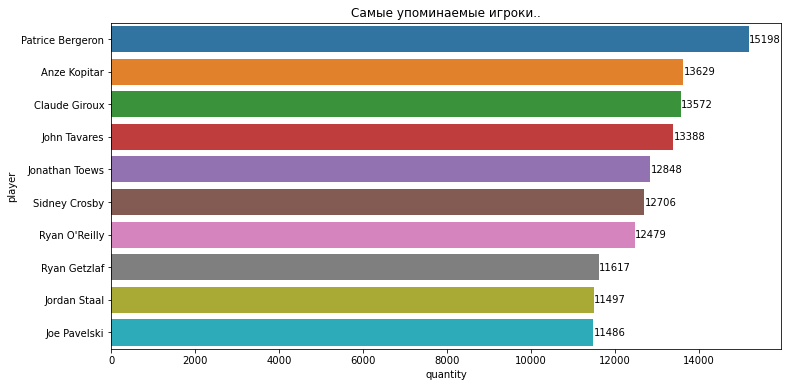

In [132]:
bars_counts('player', df, "Самые упоминаемые игроки..")

Игроки которые чаще всего упоминаются в событиях - первое и второе место **Patrice Bergeron** и **Anze Kopitar**. Это игроки, которые учавствуют не только в атакующих действиях, но и в защите (*hits*). Кстати все игроки - центральные нападающие 

In [133]:
df['player'].nunique()

2431

In [134]:
df['player_id'].nunique()

2417

В данных есть разные написания имен, нужно исправить

In [135]:
# выделим id, где по 2 игрока
ids2 = df.groupby('player_id')['player'].nunique().reset_index().query('player>1')['player_id'].tolist()

In [136]:
df.loc[df.player_id.isin(ids2)].sort_values(by='player_id')['player'].unique()

array(['Johnny Oduya', 'David Johnny Oduya', 'Patrick Maroon',
       'Pat Maroon', 'J-F Berube', 'J.F. Berube', 'Alexander Petrovic',
       'Alex Petrovic', 'TJ Tynan', 'T.J. Tynan', 'Nick Shore',
       'Nicholas Shore', 'J.T. Brown', 'JT Brown', 'Mike Matheson',
       'Michael Matheson', 'Matt Murray', 'Matthew Murray',
       "Daniel O'Regan", "Danny O'Regan", 'Calvin Petersen',
       'Cal Petersen', 'Jacob de la Rose', 'Jacob De La Rose',
       'Alexander Wennberg', 'Alex Wennberg', 'Casey DeSmith',
       'Casey Desmith', 'Timothy Gettinger', 'Tim Gettinger',
       'Alex Nylander', 'Alexander Nylander', 'Zach Aston-Reese',
       'Zachary Aston-Reese', 'Cal Foote', 'Callan Foote'], dtype=object)

Это один и теже игроки с разным написанием

In [137]:
# выберем любой из вариантов
player_map = df.loc[df.player_id.isin(ids2)][['player_id', 'player']].set_index('player_id')['player'].to_dict()
#player_map

In [138]:
# дубликаты игроков - нужны для переименования ассистентов
player_dubl =  df.loc[df.player_id.isin(ids2)].sort_values(by='player_id')['player'].unique()

player_rename = {}
for i in range(0, len(player_dubl), 2):
    player_rename[player_dubl[i+1]] = player_dubl[i]

In [139]:
# Заменяем
df.loc[df.player_id.isin(ids2), 'player'] = df.loc[df.player_id.isin(ids2), 'player_id'].map(player_map)

In [140]:
df['goalie'].nunique()

245

За 10 сезонов в NHL сыграло 245 вратаря, некоторые всего по несколько минут, но все же. 

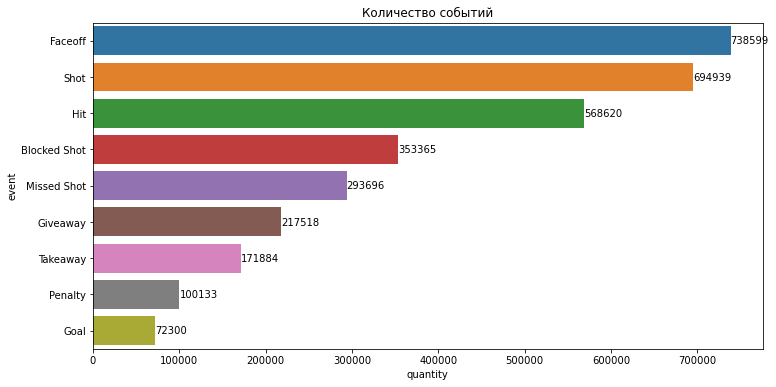

In [141]:
bars_counts('event', df, "Количество событий")

### assists и assists_ids   
Игровые передачи - возникают только при голе, и то не всегда, в остальных случаях - Nan. Ассистентов может быть как один, так и двое.  Преобразуем в в список

In [142]:
df[['pass1', 'pass2']] = df['assists'].str.split(',', n=1, expand=True)

In [143]:
# Преобразуем в список
df.loc[(~df.pass1.isna()), 'pass1'] = df.loc[
    (~df.pass1.isna()), 'pass1'].apply(lambda x: x.replace("[","").replace("]","").replace("'","").replace('"', ""))

df.loc[(~df.pass2.isna()), 'pass2'] = df.loc[
    (~df.pass2.isna()), 'pass2'].apply(lambda x: x.replace("[","").replace("]","").replace("'","").replace('"', ""))


In [144]:
df.loc[df.pass1.isin(player_rename.keys()), 'pass1'] = df.loc[df.pass1.isin(player_rename.keys()), 'pass1'].map(player_rename)
df.loc[df.pass2.isin(player_rename.keys()), 'pass2'] = df.loc[df.pass2.isin(player_rename.keys()), 'pass2'].map(player_rename)

In [145]:
# заменяем пропуск на "гол без ассистентов"
df.loc[df.pass1.isna(), 'pass1'] = 'no_assists'
df.loc[df.pass2.isna(), 'pass2'] = 'no_assists'

df.loc[df.pass1=='', 'pass1'] = 'no_assists'
df.loc[df.pass2=='', 'pass2'] = 'no_assists'

df['pass2'] = df['pass2'].apply(lambda x: x.strip())

pass1 = df.loc[(~df.pass1.isna())]['pass1'].value_counts()
pass2 = df.loc[(~df.pass2.isna())]['pass2'].value_counts()

In [146]:
df.drop(columns=['assists'], axis=1, inplace=True)

In [147]:
# словарь для переименования 
id_name = df[['player_id', 'player']].set_index('player_id')['player'].to_dict()

# переименование 
pst['player'] = pst['person'].map(id_name)


In [148]:
pst

,person,jerseyNumber,position,game_id,timeOnIce,assists,goals,shots,hits,powerPlayGoals,...,shortHandedGoals,shortHandedAssists,blocked,plusMinus,evenTimeOnIce,powerPlayTimeOnIce,shortHandedTimeOnIce,faceOffPct,season,player
0,8468635,32,Left Wing,2010020001,11:06,0,0,2,2,0,...,0,0,0,0,10:09,0:00,0:57,NaN,2010,Travis Moen
1,8467831,15,Center,2010020001,10:40,0,1,2,1,0,...,0,0,1,0,7:32,0:00,3:08,60.00,2010,Jeff Halpern
2,8471768,94,Left Wing,2010020001,13:48,0,0,1,2,0,...,0,0,1,0,10:48,0:00,3:00,100.00,2010,Tom Pyatt
3,8470603,46,Left Wing,2010020001,13:37,0,0,3,2,0,...,0,0,0,-2,11:19,2:18,0:00,NaN,2010,Andrei Kostitsyn
4,8468463,52,Left Wing,2010020001,8:40,0,0,1,1,0,...,0,0,1,0,8:40,0:00,0:00,NaN,2010,Mathieu Darche
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250125,8479705,63,Left Wing,2020020868,1:57,0,0,0,1,0,...,0,0,0,0,1:57,0:00,0:00,NaN,2020,Jeffrey Viel
250126,8474578,65,Defenseman,2020020868,24:34,0,0,2,0,0,...,0,0,0,0,21:27,3:07,0:00,NaN,2020,Erik Karlsson
250127,8476881,48,Center,2020020868,19:13,1,0,6,1,0,...,0,0,0,0,14:57,3:07,1:09,55.00,2020,Tomas Hertl
250128,8479393,73,Center,2020020868,14:35,0,0,6,1,0,...,0,0,1,-1,13:58,0:37,0:00,33.33,2020,Noah Gregor


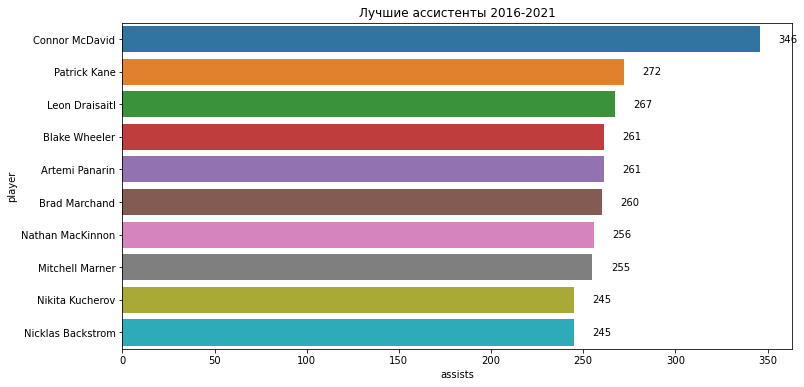

In [149]:
bars_gp('player','assists', pst.loc[pst.season>2015], 'Лучшие ассистенты 2016-2021')

В топ-20 обладатели кроме нападающих можно найти обрадателей *Норрис-трофи* **Бернс**,  **Эрик Карлсон**  и **Джон Карлсон** из Вашингтона, всем понятно почему.

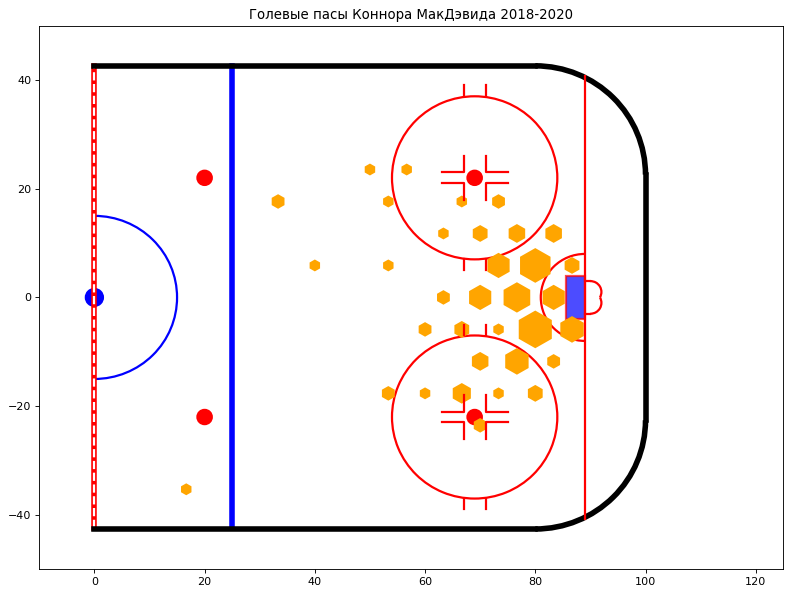

In [150]:
viz_player_shots('Голевые пасы Коннора МакДэвида 2018-2020', player='Connor McDavid', 
                 seasons=['2018', '2019', '2020'], filter=2, passing=True, shooting=False)

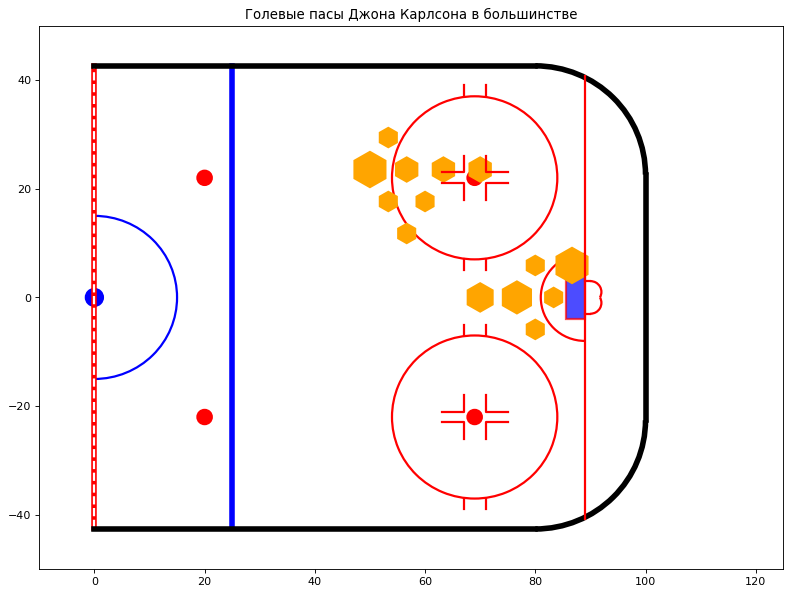

In [151]:
viz_player_shots("Голевые пасы Джона Карлсона в большинстве", player='John Carlson', stren='pp', 
                 seasons=['2018', '2019', '2020'], filter=2, passing=True, shooting=False)

### event, shot_type  и coordinates  - тип события и его координаты

In [152]:
# всего событий
events = df.event.value_counts().reset_index()
events.columns = ['event', 'count']
events

,event,count
0,Faceoff,738599
1,Shot,694939
2,Hit,568620
3,Blocked Shot,353365
4,Missed Shot,293696
5,Giveaway,217518
6,Takeaway,171884
7,Penalty,100133
8,Goal,72300


#### Типы событий:   
**Shot** - бросок по воротам, учавствуют игрок, вратарь  
**Hit** - силовой прием, учавствует 2 игрока, но второй игрок (Hittie) на котором совершен силовой прием не важен, поэтому остался только "хитующий", есть координаты события, может быть на обеих частях площадки  
**Blocked Shot** - заблокированный бросок, оставлен только игрок, который учавствует в защитной части. Для атакующего игрока, это больше случайное событие, и важно, кто лучше блокирует броски  
**Missed Shot** - Все тоже самое, что и в **Shot**, но вратарь не учавствует, т.к. бросок идет мимо ворот  
**Giveaway** - Потеря шайбы, есть потерявщий игрок  
**Takeaway** - Перехват шайбы, есть только игрок, который перехватил шайбу  
**Penalty** - Нарушение правил, тольуо игрок нарушивший правила  
**Goal** - Гол!! Игрок забивший гол, ассистенты если они есть, вратарь, если он есть (empty_net) 

In [153]:
# events_dict
ed = events.set_index('event')['count'].to_dict()

Посчитаем сколько всего по лиге: бросков, из них голевых, блокированных и сколько чистых хитов, отборов и пр.

In [154]:
shots = ['Shot', 'Blocked Shot', 'Missed Shot', 'Goal'] # события связанные с бросками

In [155]:
shots_on_goal = (ed['Shot'] + ed['Goal']) / (ed['Shot'] + ed['Blocked Shot'] + ed['Missed Shot'] + ed['Goal'])
shots_on_goal

0.542486742558156

Немногим больше половины бросков доходит до створа ворот, остальное мимо (или штанга) или блокируется

In [156]:
goal_ratio = ed['Goal'] / (ed['Goal'] + ed['Shot'])
goal_ratio

0.09423400009644974

Только каждый 11 бросок (вероятность 9,48%) в створ становится голевым

#### Типы бросков  
в статистике NHL разделяют несколько типов бросков:  
**Backhand** - бросок с "неудобной руки"  
**Deflected** - гол/бросок с отскока  
**Slap Shot** - Гол/бросок с щелчка, с замахом  
**Snap Shot** - Гол/бросок без замаха (иногда называют наброс)  
**Tip-In** - Гол/бросок с подправления, подставления клюшки  
**Wrap-around** - Гол/бросок из-за ворот  
**Wrist Shot** - Гол/бросок кистевой, с кистей  

In [157]:
shot_types = df.loc[~df.shot_type.isna()].groupby(['event', 'shot_type'])['shot_type'].count().unstack().T
shot_types['goal_ratio'] = shot_types['Goal'] / shot_types['Shot']

In [158]:
shot_types.sort_values(by = 'goal_ratio', ascending=False)

event,Goal,Shot,goal_ratio
shot_type,,,
Deflected,2224,9704,0.229184
Tip-In,6572,29546,0.222433
Backhand,7467,55911,0.133552
Snap Shot,10736,100145,0.107205
Wrist Shot,36624,361793,0.101229
Wrap-around,532,8126,0.065469
Slap Shot,8145,129714,0.062792


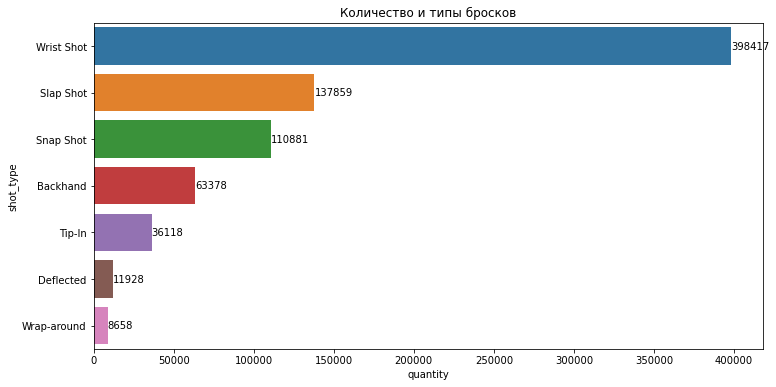

In [159]:
bars_counts('shot_type',df, 'Количество и типы бросков')

In [160]:
display(df['shot_type'].value_counts(normalize=True))

Wrist Shot     0.519287
Slap Shot      0.179682
Snap Shot      0.144520
Backhand       0.082605
Tip-In         0.047075
Deflected      0.015547
Wrap-around    0.011285
Name: shot_type, dtype: float64

Самые "убойные" виды бросков - это подправления и отскоки (**Tip-In** и **Deflected**), для вратаря они всегда неожиданны и более 20% таких бросков заканчиваются голом. Реже всего забивают "щелчком" (**Slap Shot**) - часто бросок идет от синей линии и вратарь успевает переместиться или сам бросок прихолится в экипировку вратаря.   
<BR>
По количеству больше всего кистевых бросков (**Wrist Shot**) - 52%  
Остальные типа бросков "крюком" (**Slap** и **Snap** **Shots**) в сумме 32%  
Бэкхенды (**Backhand**) и подправления (**Tip-In**) суммрано дают 13% (8%+5%)  
Броски с отскока и из-за ворот это редкость - суммарно 2,5%

In [161]:
df.drop(columns=['coordinates', 'assists_ids'], axis=1, inplace=True)

### Время, период, команды, и сила(составы) команды   

#### period - период 
1-3 - 3 игровых периода  
4 - Овертайм  
5 - серия буллитов

In [162]:
df['period'].value_counts(normalize=True)

1    0.338243
2    0.335976
3    0.310558
4    0.012308
5    0.002915
Name: period, dtype: float64

Большиноство событий происходит в первые 2 периода, в 3м чуть меньше. На овертаймы приходится около 1% событий. В нашем случае буллиты не интересны, удаляем

In [163]:
df = df.loc[df.period<=4]

#### время периода   
время указано в минутах и секундах, для удобства переведем в числовой формат

In [164]:
df['periodTime'] = df['periodTime'].apply(time_min).round(2)

#### tema_str - сила(составы) команд

In [165]:
df.groupby(['team_str', 'event'])['team_str'].count().unstack()

event,Goal
team_str,
Even,52640
Power Play,14716
Short Handed,1969


Данное событие нужно, только при когда забивают гол(*event==goal*), как он был забит:   
- в равных составах (**Even**),   
- большинстве (**power play**)   
- или меньшинстве (**short handed**)

### description и team, goals   
содержат больше справочную информацию и для исследования действий игроков могут не пригодиться

In [166]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
description,3201694,1186192,Alex Ovechkin - Wide of Net,1156,NaN,NaN,NaN,NaN,NaN,NaN,NaN
event,3201694,9,Faceoff,738599,NaN,NaN,NaN,NaN,NaN,NaN,NaN
game_id,3.20169e+06,NaN,NaN,NaN,2.01497e+09,3.07234e+06,2.01002e+09,2.01202e+09,2.01502e+09,2.01802e+09,2.02002e+09
goalie,756308,245,Carey Price,16770,NaN,NaN,NaN,NaN,NaN,NaN,NaN
goals,3201694,94,"{'away': 0, 'home': 0}",650514,NaN,NaN,NaN,NaN,NaN,NaN,NaN
period,3.20169e+06,NaN,NaN,NaN,1.99692,0.836699,1,1,2,3,4
periodTime,3.20169e+06,NaN,NaN,NaN,9.80916,5.84534,0,4.7,9.7,14.85,20
player,3201694,2413,Patrice Bergeron,15149,NaN,NaN,NaN,NaN,NaN,NaN,NaN
player_id,3.20169e+06,NaN,NaN,NaN,8.47338e+06,3962.83,8.44648e+06,8.47066e+06,8.47414e+06,8.47642e+06,8.48265e+06
player_type,3201694,8,shooter,982252,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Каких данных нет ?  
Самое необходимое - получить общее время игрока на площадке (**icing time**), позицию игрока, хват клюшки и пр. Эти данные есть в другом датасете. 

In [167]:
# почистим от дубликатов для начала
pl = pl.drop_duplicates(subset='id', keep='last')

### Players - база данных игроков

### Описание столбцов  
-----
**id** - уникальный **id** игрока  
**fullname** - имя игрока  
**primaryNumber** - игровой номер  
**burthDate** - дата рождения  
**currentAgr** - текущий возраст  
**nationality** - национальность  
**height** - рост в американской системе  
**weight** - вес в американской системе  
**shootCatches** - хват клюшки или ловашка для вратаря  
**currentTeam** - текущая команда  
**primaryPosition** - основная позиция  

In [168]:
pl.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,2530,NaN,NaN,NaN,8.47446e+06,4853.44,8.44648e+06,8.47139e+06,8.47538e+06,8.47792e+06,8.48265e+06
fullName,2530,2527,Colin White,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
primaryNumber,2465,NaN,NaN,NaN,36.4897,23.4914,1,18,32,51,98
birthDate,2530,2129,1991-01-03,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nationality,2528,25,CAN,1178,NaN,NaN,NaN,NaN,NaN,NaN,NaN
height,2529,18,"6' 1""",456,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weight,2529,NaN,NaN,NaN,199.752,15.8691,140,189,200,210,265
shootsCatches,2523,2,L,1655,NaN,NaN,NaN,NaN,NaN,NaN,NaN
primaryPosition,2530,5,D,773,NaN,NaN,NaN,NaN,NaN,NaN,NaN
currentAge,1519,NaN,NaN,NaN,27.5359,4.488,18,24,27,30,48


#### id,  fillname, primaryNumber  - id игрока,  его имя, игрвой номер
В предыдущей таблице, удаляли дубликаты имен и лучше использовать только id, также в базе игроков, могут быть те, кто ни разу не выходил на площадку, или не учавствовал в игровах событиях.   
Игровой номер - больше для протокола и мерча, чем для статистики.  
Оставляем только **id**

#### birthDate, currentAge, nationality - дата рождения, возраст, национальность   
Основная задача подбор игроков для будущих сезонов, поэтому смысл только использовать текущий возраст, поэтому его придется вычислять заново по дате рождения.  Национальность тоже не важна (или важна для тренера?)  
удаляем **currentAge**, вместо него потом создадим  **Age**

**currentAge/Age** - возраст игроков   

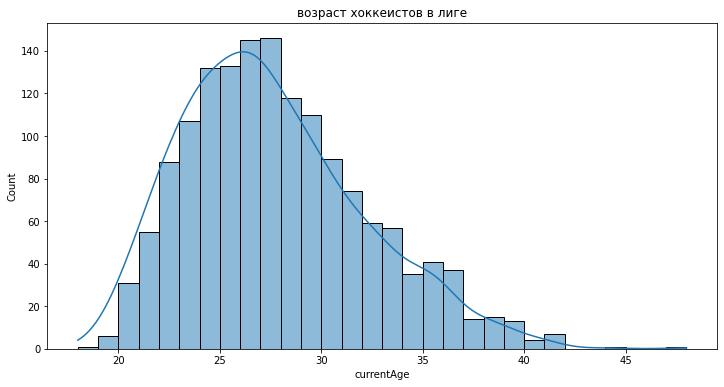

In [169]:
histplot('currentAge', pl, 'возраст хоккеистов в лиге', bins=30)

Чтобы лучше понять гистограмму, нужно вспомнить структура контрактов NHL   
* 18-19 летних игроков выбирают на драфте NHL, получают контракт новичка (3+1 года) и могут продолжить играть в молодежной лиге (год) или в фарм-клубе АХЛ.  
* 22-26 лет. Переходные контракты (арбитраж, RFA и пр.) , игроки могут играть в других странах и лигах, но права сохраняет клуб NHL, также у многих двусторонние контракты и могут числиться в АХЛ весь сезон.  
* 26 лет - игрок получает статус UFA (свободный агент) и может сам выбирать клуб. Часто игроки начинают возвращаться из других лиг, текущие игроки подписывают односторонние контракты.  
* 30 лет - Средниее игроки могут закончить карьеру или уехать в европу  
* 35+ лет - остаются или игроки на длинных контрактах, вратари и некоторые звезды, которые еще в форме  
* 45+ - Здено Хара и Яромир Ягр ))   

Пик результативности нападающих приходится на 24 года, для защитников лучшая игра 26-28 лет, вратари первые годы всегда проводят в фарма-клубе и становиятся основным вратарями клуба позже. 

#### nationality - национальность

In [170]:
pl['nationality'].unique()

array(['CAN', 'DEU', 'USA', 'SVK', 'CHE', 'SWE', 'CZE', 'RUS', 'LVA',
       'FIN', 'NOR', 'BLR', 'BHS', 'SVN', 'AUT', 'KAZ', 'UKR', 'NGA',
       'FRA', 'DNK', 'LTU', 'HRV', nan, 'GBR', 'AUS', 'NLD'], dtype=object)

In [171]:
pl['nationality'].value_counts().head(5)

CAN    1178
USA     671
SWE     201
RUS     122
FIN     115
Name: nationality, dtype: int64

Больше всего канадцев (почти половина лиги), американцев(25%). Шведов около 160 человек, русских и фонов почти 100 человек. Можно найти по 1 игроку из Франции, Норвегии, Голландии 

#### primaryNumber - игровой номер  
Столбец не нужен, но какой номер самый популярный ? 

In [172]:
pl['primaryNumber'].value_counts()

28.0    61
29.0    54
22.0    53
20.0    51
17.0    51
        ..
96.0     6
85.0     5
95.0     4
87.0     2
98.0     2
Name: primaryNumber, Length: 96, dtype: int64

Самый популярный номер - 28. Почему? 
Всего 2 87-х номера в Лиге за последние годы: Кросби и Шипачев.

In [173]:
pl.loc[pl.primaryNumber==87]

,id,fullName,primaryNumber,birthDate,nationality,height,weight,shootsCatches,primaryPosition,currentAge,currentTeam
2045,8479650,Vadim Shipachyov,87.0,1987-03-12,RUS,"6' 0""",187.0,L,C,33.0,Vegas Golden Knights
5642,8471675,Sidney Crosby,87.0,1987-08-07,CAN,"5' 11""",200.0,L,C,33.0,Pittsburgh Penguins


#### height и weight - рост и вес

In [174]:
digits = re.compile("\d+")

In [175]:
def height_sm(height):
    try: 
        ref = re.findall(digits, height)
        h_1 = float(ref[0])*30.8
        if len(ref)>1:
            h_2 = float(ref[1])*2.54
    except TypeError:
        h_1 = 0
        h_2 = 0
    return h_1+h_2

In [176]:
# переводим рост в см
pl['height'] = pl['height'].apply(height_sm).astype('int')

In [177]:
# удаляем игроков, уже не играют 
pl = pl.loc[pl.height>0]

In [178]:
# переводим вес в кг
pl['weight'] = (pl['weight']*0.4535).astype('int')

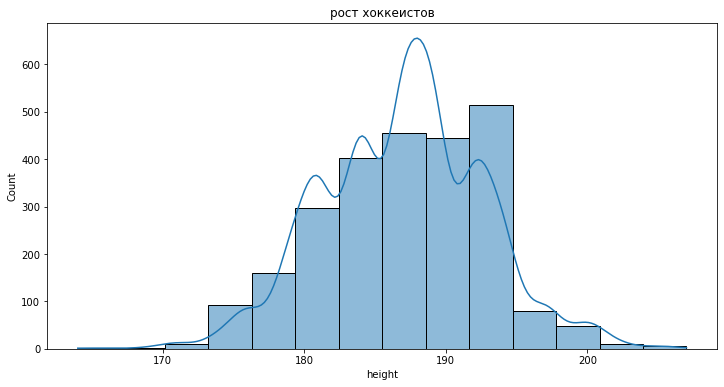

In [179]:
histplot('height', pl, 'рост хоккеистов', bins=14)

In [180]:
pl['height'].describe()

count    2529.000000
mean      186.988138
std         5.673181
min       164.000000
25%       184.000000
50%       187.000000
75%       192.000000
max       207.000000
Name: height, dtype: float64

Средний рост - 187, если не брать самых маленьких игроков (164 см) и Здено Хару (207 см), то половина всех игроков укладывается в промежуток 184-192 см

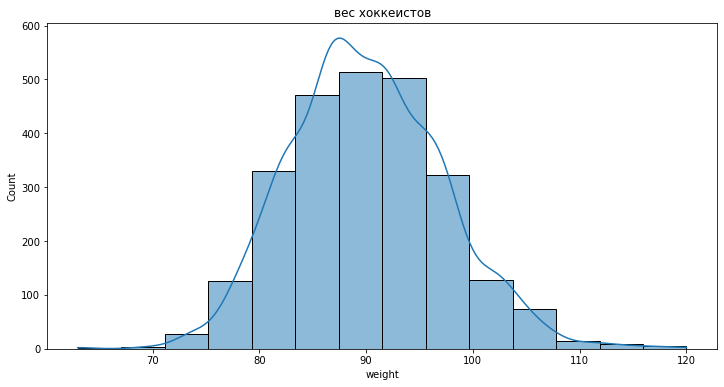

In [181]:
histplot('weight', pl, 'вес хоккеистов', bins=14)

In [182]:
pl['weight'].describe()

count    2529.000000
mean       90.064848
std         7.209220
min        63.000000
25%        85.000000
50%        90.000000
75%        95.000000
max       120.000000
Name: weight, dtype: float64

Средний вес 89 кг, 50% укладывается в промужуток 85-94 кг, минимальный вес 63 кг, максимальный 120 кг. Это Никита Трямкин и Дерек Броссард.

In [183]:
pl.loc[(pl.weight==pl.weight.max())|(pl.weight==pl.weight.min())]

,id,fullName,primaryNumber,birthDate,nationality,height,weight,shootsCatches,primaryPosition,currentAge,currentTeam
88,8469647,Derek Boogaard,94.0,1982-06-23,CAN,202,120,L,LW,NaN,Free Agent
1992,8477997,Nikita Tryamkin,88.0,1994-08-30,RUS,202,120,L,D,25.0,Vancouver Canucks
2101,8480524,Tyler Stewart,NaN,1992-04-23,USA,166,63,L,G,NaN,Free Agent
4197,8479547,Matthew Phillips,47.0,1998-04-06,CAN,171,63,R,C,22.0,Calgary Flames


#### shootsCatches - броски/ловушка

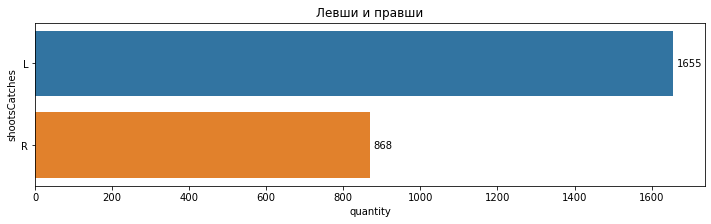

In [184]:
bars_counts('shootsCatches', pl, 'Левши и правши', fig_size=[12,3] )

Леворуких игроков почти в 2 раза больше чем праворуких. Всего 24 вратаря у кого ловушка справа, что доставляет неудобство форвардам ) Трое из них скорее всего уже не без клуба, Мейсон тоже. Из основных и запасных только: Хатчинсон, Францоуз, Доминге 

#### primaryPosition - основная позиция    
Довольно спорная позиция. Часто игроки меняют позицию по ходу сезона из-за травм одноклубников. Меняют по игровым причинам, врядли кто помнит, что Кузнецов начинал правым вингером, а Бернс - нападающим (вратарем). Но есть еще протоколы матча и другие источники данных (capfriendly, eliteprospects). Пока достаточно, но потом может придется уточнять

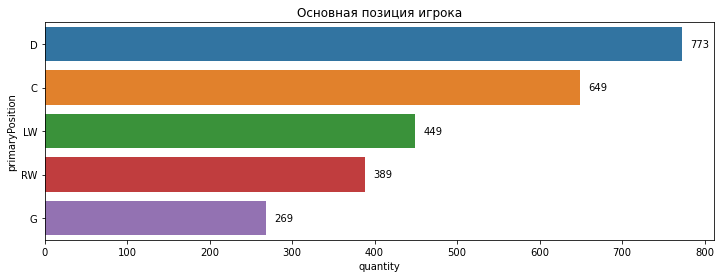

In [185]:
bars_counts('primaryPosition', pl, 'Основная позиция игрока', fig_size=[12,4] )

Больше всего защитников - 773 игрока, потому что их 2 на каждую пятерку   
Центральных -  649 человек, в НХЛ центральным может считаться тот игрок, который выходит на вбрасывание. 
Левых и правых 449+389 человек, часто игркои могут играть на обоих флангах. Правых меньше, из-за того, что меньше именно праворуких игроков. 

#### Объединяем df и pl

In [186]:
df = df.merge(pl[['id', 'primaryPosition', 'shootsCatches', 
                  'weight', 'height']], left_on='player_id', right_on='id', how='left')

In [190]:
#df.drop(columns = ['id'], axis=1, inplace=True)

In [191]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
description,3201694,1186192,Alex Ovechkin - Wide of Net,1156,NaN,NaN,NaN,NaN,NaN,NaN,NaN
event,3201694,9,Faceoff,738599,NaN,NaN,NaN,NaN,NaN,NaN,NaN
game_id,3.20169e+06,NaN,NaN,NaN,2.01497e+09,3.07234e+06,2.01002e+09,2.01202e+09,2.01502e+09,2.01802e+09,2.02002e+09
goalie,756308,245,Carey Price,16770,NaN,NaN,NaN,NaN,NaN,NaN,NaN
goals,3201694,94,"{'away': 0, 'home': 0}",650514,NaN,NaN,NaN,NaN,NaN,NaN,NaN
period,3.20169e+06,NaN,NaN,NaN,1.99692,0.836699,1,1,2,3,4
periodTime,3.20169e+06,NaN,NaN,NaN,9.80916,5.84534,0,4.7,9.7,14.85,20
player,3201694,2413,Patrice Bergeron,15149,NaN,NaN,NaN,NaN,NaN,NaN,NaN
player_id,3.20169e+06,NaN,NaN,NaN,8.47338e+06,3962.83,8.44648e+06,8.47066e+06,8.47414e+06,8.47642e+06,8.48265e+06
player_type,3201694,8,shooter,982252,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Средняя статистика по лиге

In [193]:
all_league = df.event.value_counts()

player_total_shots = all_league['Shot'] + all_league['Goal']
player_goal_pct = all_league['Goal']/player_total_shots
league_total_shots = all_league['Shot'] + all_league['Goal']
league_goal_pct = all_league['Goal']/league_total_shots
PL_e_spread = player_goal_pct-league_goal_pct


print("Player Total Shots: " + str(player_total_shots))
print("Player Total Goals: " + str(all_league['Goal']))
print("Player SOG %: " + str(player_goal_pct))


print("League Total Shots: " + str(league_total_shots))
print("League SOG %: " + str(league_goal_pct))

# Get the average spread on shot efficiency
print("Player Vs League SOG% Spread: " + str(PL_e_spread))

Player Total Shots: 759464
Player Total Goals: 69325
Player SOG %: 0.09128148272992531
League Total Shots: 759464
League SOG %: 0.09128148272992531
Player Vs League SOG% Spread: 0.0


### Статистика игроков - pst

In [194]:
pst.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
person,453134,NaN,NaN,NaN,8.47347e+06,4097.64,8.44648e+06,8.47076e+06,8.47419e+06,8.47645e+06,8.48265e+06
jerseyNumber,453134,NaN,NaN,NaN,32.3703,24.7993,2,13,24,47,98
position,453134,4,Defenseman,152359,NaN,NaN,NaN,NaN,NaN,NaN,NaN
game_id,453134,NaN,NaN,NaN,2.01497e+09,3.08353e+06,2.01002e+09,2.01202e+09,2.01502e+09,2.01802e+09,2.02002e+09
timeOnIce,453134,2038,17:40,692,NaN,NaN,NaN,NaN,NaN,NaN,NaN
assists,453134,NaN,NaN,NaN,0.261373,0.530233,0,0,0,0,6
goals,453134,NaN,NaN,NaN,0.154365,0.407205,0,0,0,0,5
shots,453134,NaN,NaN,NaN,1.68983,1.53503,0,1,1,3,15
hits,453134,NaN,NaN,NaN,1.26471,1.42661,0,0,1,2,15
powerPlayGoals,453134,NaN,NaN,NaN,0.0327298,0.184409,0,0,0,0,3


### Описание столбцов  
-----
**person** - уникальный **id** игрока  
**jerseyNumber** - номер на свитере  
**position** - Основная позиция  
**game_id** - **id** игры  
**timeOnIce** - время на льду  
**assists** - передачи за игру  
**goals** - голы за игру  
**shots** - броски за игру  
**hits** - силовые приемы за игру  
**powerPlayGoals** - голы в большинстве  
**powerPlayAssists** - передачи в большинстве  
**faceOffWins** - выигранные вбрасывания  
**faceOffTaken** - все вбрасываний  
**takeaways** - перехваты  
**giveaways** - потери  
**shortHandedGoals** - голы в меньшинстве  
**shortHandedAssists** - передачи в меньшинстве  
**blocked** - заблокированные броски   
**plusMinus** - Рейтинг полезности "плюс-минус"  
**evenTimeOnIce** - время в равных составах  
**PowerplayTimeOnIce** - время в большинстве  
**ShortHandedTimeOnIce** - время в меньшинстве  
**faceOffPct** - выигранный процент вбрасываний 

Данный датасет нужен для удобства подсчета данных и получения статистических данных (например время на льду). Чтобы типы данных совпадали, создадим столбец **season** и номер игры **match_num**. Преобразуем время на льду в числовой формат

In [195]:
pst['timeOnIce'] = pst['timeOnIce'].apply(time_min).round(2)

In [196]:
pst['evenTimeOnIce'] = pst['evenTimeOnIce'].apply(time_min).round(2)
pst['powerPlayTimeOnIce'] = pst['powerPlayTimeOnIce'].apply(time_min).round(2)
pst['shortHandedTimeOnIce'] = pst['shortHandedTimeOnIce'].apply(time_min).round(2)

In [197]:
pst.head(2)

,person,jerseyNumber,position,game_id,timeOnIce,assists,goals,shots,hits,powerPlayGoals,...,shortHandedGoals,shortHandedAssists,blocked,plusMinus,evenTimeOnIce,powerPlayTimeOnIce,shortHandedTimeOnIce,faceOffPct,season,player
0,8468635,32,Left Wing,2010020001,11.10,0,0,2,2,0,...,0,0,0,0,10.15,0.0,0.95,NaN,2010,Travis Moen
1,8467831,15,Center,2010020001,10.67,0,1,2,1,0,...,0,0,1,0,7.53,0.0,3.13,60.0,2010,Jeff Halpern


## Корреляционный анализ 

# Подготовка данных

При расчете не удобно пользоваться координатами **x;y** поэтому переведем их в полярные координаты **R** - расстояние до центра ворот и угол броска **A** - нулевая плоскость будет проходить через центр площадки. Угол будет как положительный, так и отрицательный - чтобы проверить различие между леворукими и праворукими игроками  
<BR>  
Координаты центра ворот - (89;0) 

## Feature Engeneering 

##### Признаки которые есть сейчас  
* Тип броска (Wrist, Slap и т.д.) 
* Хват клюшки игрока 
* Тип игрока - основная позиция  
* Составы - равные или нет  

##### Добавим дополнительные признаки 
* Расстояние до ворот ( в полярных координатах)
* Угол броска (в полярных координатах)  
* Угол броска (обзора)  
* Добавим событие - подбор шайбы (rebound)  
* Если подбор шайбы - то скорость изменения угла в единицу времени (секунду) 
* Время с последнего события  
* Тип последнего события  
* Время в большинстве (если есть)  
* Расстояние от предыдущего события 

In [205]:
# нормализуем
df.loc[df.x<0, 'x_norm'] = df['x'] * (-1)
df.loc[df.x<0, 'y_norm'] = df['y'] * (-1)
df.loc[df.x_norm.isna(), 'x_norm'] = df.loc[df.x_norm.isna(), 'x']
df.loc[df.y_norm.isna(), 'y_norm'] = df.loc[df.y_norm.isna(), 'y']

In [206]:
# distance 
df.loc[:, 'distance'] = np.sqrt((abs(df['x']) - 89)**2 + df['y']**2)

In [207]:
# Angle
df.loc[(df.y_norm!=0), 'angle'] = np.arctan(df.loc[df.y_norm!=0, 'y_norm']/(89-df.loc[df.y_norm!=0, 'x_norm']))*180/np.pi * (-1)
df['angle'] = df.angle.fillna(0)

In [208]:
df.loc[(df.x_norm<=89)&(df.y_norm>=0), 'sector'] = 'nw'
df.loc[(df.x_norm<=89)&(df.y_norm<=0), 'sector'] = 'sw'
df.loc[(df.x_norm>89)&(df.y_norm>0), 'sector'] = 'ne'
df.loc[(df.x_norm>89)&(df.y_norm<0), 'sector'] = 'se'

In [209]:
df.loc[df.sector=='nw', 'angle'] = df.loc[df.sector=='nw', 'angle'] + 90
df.loc[df.sector=='ne', 'angle'] = (90 - df.loc[df.sector=='ne', 'angle']) * (-1) 
df.loc[df.sector=='sw', 'angle'] = 90 - df.loc[df.sector=='sw', 'angle']
df.loc[df.sector=='se', 'angle'] = df.loc[df.sector=='se', 'angle'] * (-1) - 90

In [210]:
# угол до 1 штанги
df.loc[(df.x_norm!=89), 'angle1'] = np.arctan((
    df.loc[(df.x_norm!=89), 'y_norm']-3)/(df.loc[(df.x_norm!=89), 'x_norm']-89))*180/np.pi

# угол до 2 штанги
df.loc[(df.x_norm!=89), 'angle2'] = np.arctan((
    df.loc[(df.x_norm!=89), 'y_norm']+3)/(df.loc[(df.x_norm!=89), 'x_norm']-89))*180/np.pi

df['angle1'] = df['angle1'].fillna(0)
df['angle2'] = df['angle2'].fillna(0)

# считаем угол "обстрела"
df.loc[df.y_norm>0, 'sh_angle'] = df.loc[df.y_norm>0, 'angle1'] - df.loc[df.y_norm>0, 'angle2']
df.loc[df.y_norm<=0, 'sh_angle'] = df.loc[df.y_norm<=0, 'angle2'] - df.loc[df.y_norm<=0, 'angle1']

# отрицательный угол при броске из-за линии ворот
df.loc[df.x_norm<=89, 'sh_angle'] = df.loc[df.x_norm<=89, 'sh_angle'].abs()
df.loc[df.x_norm>89, 'sh_angle'] = df.loc[df.x_norm>89, 'sh_angle'].abs() * (-1)

# удаляем столбцы с углами
df.drop(columns=['angle1', 'angle2'], axis=1, inplace=True)

# создаем события из предыдущей строки
df['prev_game'] = df['game_id'].shift(1)
df['prev_period'] = df['period'].shift(1)
df['prev_sh_angl'] = df['sh_angle'].shift(1)

# фильтр для фиксации 1 периода в одной игре, для цепочки событий
one_game = (df['game_id'] == df['prev_game'])&(df['period']==df['prev_period']) 

# тип последнего события
df.loc[one_game, 'prev_event'] = df.loc[one_game, 'event'].shift(1)

# Фиксим первую строчку
df['prev_period'] = df.prev_period.fillna(method='bfill')
df['prev_game'] = df.game_id.fillna(method='bfill')

# time between events
df.loc[one_game, 'time_be'] = df.loc[one_game, 'periodTime'] - df.loc[one_game, 'periodTime'].shift(1)

# distance betwwen events
df.loc[one_game, 'x_prev'] = df.loc[one_game, 'x'].shift(1)
df.loc[one_game, 'y_prev'] = df.loc[one_game, 'y'].shift(1)

df['dist_be'] = (((df['x'] - df['x_prev'])**2 + (df['y'] - df['y_prev'])**2)**0.5).round(0)

In [211]:
# фильтр для фиксации 1 периода в одной игре, для цепочки событий
one_game = (df['game_id'] == df['prev_game'])&(df['period']==df['prev_period']) 


TIME_THRESH = 0.1
rebound = (df.prev_event.isin(['Shot', 'Missed Shot', 'Blocked Shot'])) & (
    df.event.isin(['Goal', 'Shot']) & (df.time_be<TIME_THRESH) & (
        df['game_id'] == df['prev_game'])&(df['period']==df['prev_period']))

In [212]:
df.loc[rebound&(df.event=='Goal'), 'rebound'] = 'rebound_shot'
df.loc[rebound&(df.event!='Goal'), 'rebound'] = 'rebound_shot'
df.loc[df.rebound.isna(), 'rebound'] = 'not_rebound'

In [213]:
df.loc[:, 'angle_vel'] = np.abs((180 - df['sh_angle'] - df['prev_sh_angl']) / (df['time_be']*60))

In [214]:

# Фиксим небольшие ошибки 
df['goalie'] = df['goalie'].fillna('pull_goalie')
df.loc[df.shot_type.isna(), 'shot_type'] = 'missed_shot'
df.loc[df.team_str.isna(), 'team_str'] = 'Even'
df.primaryPosition = df.primaryPosition.fillna('C')
df.shootsCatches = df.shootsCatches.fillna('L')
df['weight'] = df['weight'].fillna(df['weight'].median())
df['height'] = df['height'].fillna(df['height'].median())
df.prev_event = df.prev_event.fillna('Faceoff')
df['time_be'] = df['time_be'].fillna(0)
df['dist_be'] = df['dist_be'].fillna(0)
df['angle_vel'] = df['angle_vel'].fillna(0)

In [229]:
cols_to_drop = ['description', 'game_id', 'goals', 'period', 'player_id', 
                'x', 'y', 'player_type', 'x_norm', 'y_norm', 
                'prev_game', 'prev_period', 'prev_sh_angl', 'x_prev', 'y_prev', 'match_num', 'team', 'player', 'event', 
                'team_str', 'pass1', 'pass2', 'angle', 'weight']

#df.drop(columns=cols_to_drop, inplace=True)

In [223]:
num_cols = ['period', 'periodTime', 'height', 'weight', 'distance', 'angle', 'sh_angle', 'dist_be', 'angle_vel', 'Goal']

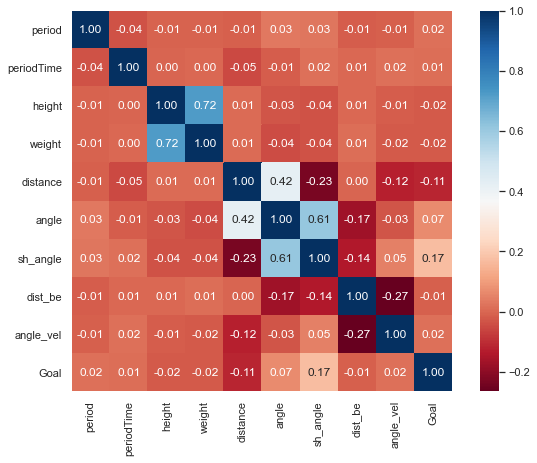

In [224]:
# теперь посмотрим на корреляцию числовых признаков между собой после преобразований
sns.set (font_scale=1)
plt.subplots (figsize=(10,7))
sns.heatmap(df[num_cols].corr(), square=True, annot=True, fmt=".2f", cmap="RdBu");

Из числовых самый большой коэффициент корреляции у угла броска. В пустые ворота забить гораздо проще, никто не спорит. Но 0.17 это немного. Коррелируют между собой вес и рост. Есть корреляция между геометрическими параметрами. Углом и углом обстрела, один из них можно убрать. Также уберем вес, оставим только рост. Это достаточная характеристика, чтобы классифицировать физиологию игрока.

### Подготовка к ML

In [225]:
df.drop(cols_to_drop, axis=1).isna().sum()

goalie                0
periodTime            0
shot_type             0
Goal                  0
season                0
primaryPosition       0
shootsCatches         0
height                0
distance              0
angle                 0
sector             3506
prev_event            0
time_be               0
dist_be               0
rebound               0
angle_vel             0
dtype: int64

In [226]:
df.loc[df['angle_vel']==np.inf, 'angle_vel'] = 180
df.loc[df.sector.isna(), 'sector'] = 'nw'
df.loc[df.time_be<0, 'time_be'] = 0  # начало нового периода

In [227]:
# относительный вес
#df['we/he'] = df['weight'] / df['height']

In [228]:
scaler = MinMaxScaler()

#df['weight'] = scaler.fit_transform(df['weight'].values.reshape(-1,1))
df['height'] = scaler.fit_transform(df['height'].values.reshape(-1,1))

In [230]:
from sklearn.preprocessing import power_transform

#df['angle'] = power_transform(df['angle'].values.reshape(-1,1))
df['sh_angle'] = power_transform(df['sh_angle'].values.reshape(-1,1))

In [231]:
df['time_be'] = df['time_be'].apply(lambda x: np.log(x+1))
df['dist_be'] = df['dist_be'].apply(lambda x: np.log(x+1))
df['angle_vel'] = df['angle_vel'].apply(lambda x: np.log(x+1))

In [232]:
df.head(2)

,description,event,game_id,goalie,goals,period,periodTime,player,player_id,player_type,...,prev_game,prev_period,prev_sh_angl,prev_event,time_be,x_prev,y_prev,dist_be,rebound,angle_vel
0,Scott Gomez faceoff won against Tim Brent,Faceoff,2010020001,pull_goalie,"{'away': 0, 'home': 0}",1,0.00,Scott Gomez,8467351,faceoff_winner,...,2010020001,1.0,NaN,Faceoff,0.0,NaN,NaN,0.0,not_rebound,0.0
1,Tim Brent hit Josh Gorges,Hit,2010020001,pull_goalie,"{'away': 0, 'home': 0}",1,0.25,Tim Brent,8470283,hitter,...,2010020001,1.0,3.861175,Faceoff,0.0,NaN,NaN,0.0,not_rebound,0.0


# xG - Expected Goals 

xG («expected goals») — это модель ожидаемых голов. В основе такой модели лежит показатель (как правило, удары по воротам — это не всегда удары по воротам, но на данном этапе будем отталкиваться от того, что они и есть наш показатель), который помогает заглянуть дальше счета на табло и оценить, сколько голов при прочих равных должна была забить команда с ударами такой остроты. 
<BR>  
Каждому удару каждой команды присваивается коэффициент опасности (в каждой xG-модели он присваивается по-разному, с конкретными примерами разберемся позже). Коэффициенты суммируются — мы получаем что-то вроде альтернативного счета матча, основанного на качестве созданных каждой из команд моментов. Следует оговориться, что в качестве базового показателя не всегда выступают удары по воротам (иногда это удары в створ, в одной из последних моделей и вовсе передачи в «убойной зоне»).  
<BR>  
Для примера рассмотрим карты бросков и голов Патрика Кейна (Чикаго) и Тори Крюга (Бостон). Оба игрока леворукие, только Кейн игрок атаки и играет на правом фланге, а Крюг игрок защиты и чаще играет на левом фланге. Из карты бросков можно заметить сходство леворукие игроки с левого фланга забивают меньше. Не смотря на большок количество бросов/набросов от синей линии, конверсия очень низкая. Если в среднем в лиге каждый 11й бросок заканчивается голом, от при бросках от синей линии, или от бортов может опускаться до 3-4%. Но как посчитать вероятность того, какая зона и какой фактор являются решающими при броске. Здесь на помощь приходит бустинг и логистическая регрессия. 

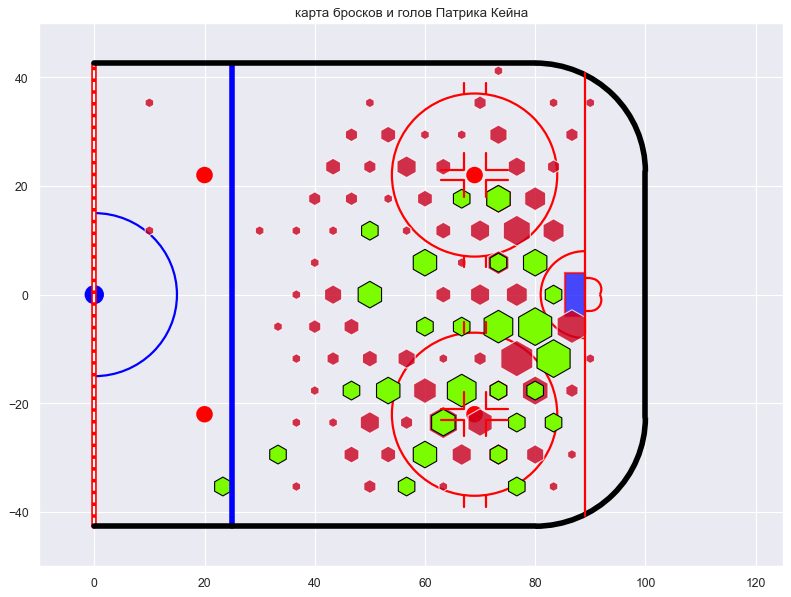

In [235]:
viz_player_shots("карта бросков и голов Патрика Кейна", player='Patrick Kane',  seasons=['2018'], filter=1, passing=False)

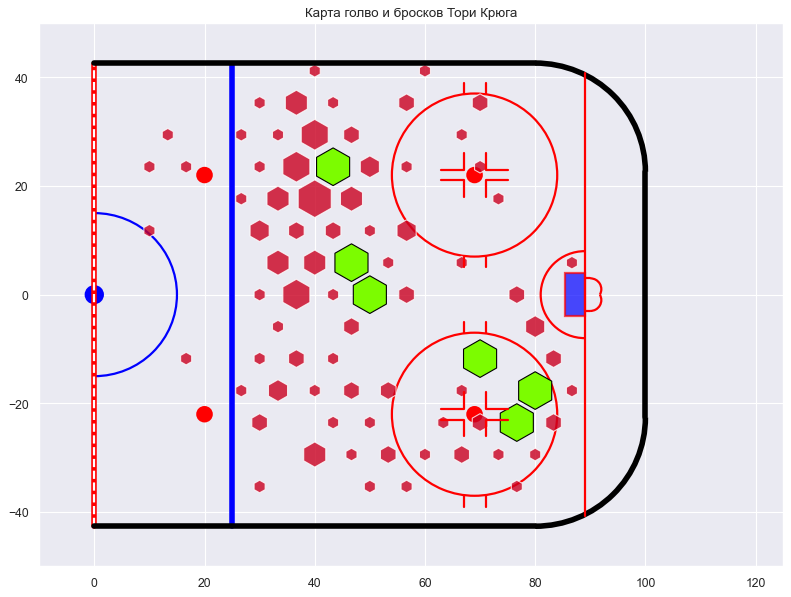

In [236]:
viz_player_shots("Карта голво и бросков Тори Крюга", player='Torey Krug',  seasons=['2018'], filter=1, passing=False)

## LightAuto ML

Первая задача определить зависимость при которой бросок становится голом. В качестве исходных обезличенные броски (игрок, составы), координаты, тип броска, время периода, а также событие - **rebound** - добивание после броска

In [237]:
N_THREADS = 24 # threads cnt for LightAutoML models (PLEASE CHANGE IT )
N_FOLDS = 5 # folds cnt for AutoML
RANDOM_STATE = 42 # fixed random state for various reasons
TEST_SIZE = 0.2 # Test size for metric check
TIMEOUT = 3600 # Time in seconds for automl run
TARGET_NAME = 'Goal' # Target column name

np.random.seed(RANDOM_STATE)
torch.set_num_threads(N_THREADS)

In [238]:
X = df.loc[df.event.isin(['Goal', 'Shot'])].query('season<2018')
y = df.loc[df.event.isin(['Goal', 'Shot'])].query('season<2018')['Goal'].values

X_val = df.loc[df.event.isin(['Goal', 'Shot'])].query('season>=2018')
y_val = df.loc[df.event.isin(['Goal', 'Shot'])].query('season>=2018')['Goal'].values

In [242]:
X.loc[X.goalie=='pull_goalie', 'goalie'] = np.nan
X['goalie'] = X['goalie'].fillna(method='ffill')

In [269]:
task = Task('binary', metric = 'auc')
roles = {'target': TARGET_NAME,
           'drop': cols_to_drop+['shootsCatches', 'sector', 'primaryPosition', 'season', 'goalie'],
         }

In [270]:
automl = TabularAutoML(task = task, 
                       timeout = TIMEOUT,
                       cpu_limit = N_THREADS,
                       reader_params = {'n_jobs': N_THREADS, 'cv': N_FOLDS, 'random_state': RANDOM_STATE},
                       verbose = 1
                      )
oof_pred = automl.fit_predict(X, roles = roles)
print('oof_pred:\n{}\nShape = {}'.format(oof_pred, oof_pred.shape))

oof_pred:
array([[0.12939826],
       [0.07475655],
       [0.13126187],
       ...,
       [0.05876531],
       [0.15477997],
       [0.2170266 ]], dtype=float32)
Shape = (759464, 1)


<AxesSubplot:xlabel='Feature'>

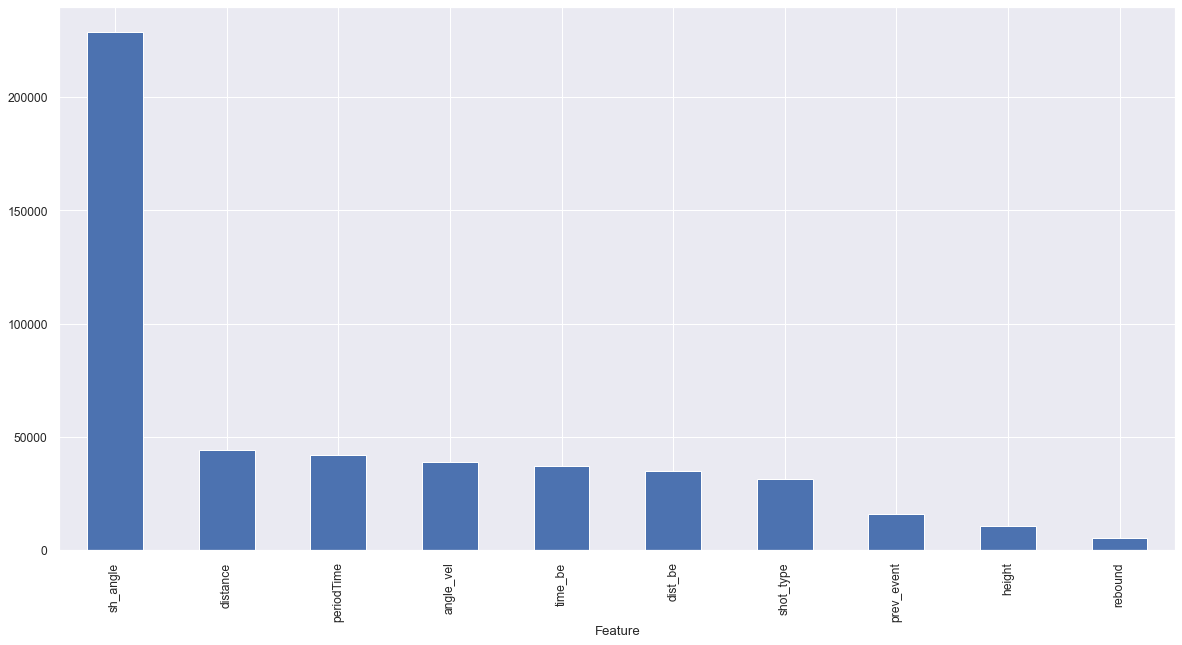

In [271]:
fast_fi = automl.get_feature_scores('fast')
fast_fi.set_index('Feature')['Importance'].plot.bar(figsize = (20, 10), grid = True)

Какие факторы оказались наиболее влиятельными.  
- Угол "обстрела" - самый логичный вариант, у пустых ворот угол может приближаться к 90 градусам, у броска от синей линии - всего лишь несколько градусов.  
- параметры броска, полярные координаты расстояние и угол между центром площадки  
- время, расстояние между событиями  
- тип броска  
- параметры игрока    
- подбор     
<BR>  
Хороший пример как меняется xG в зависимости от ситуации  
    <A>https://www.youtube.com/watch?v=akVZtvcLr_Q&t=30s</A>

In [272]:
y_pred = automl.predict(X_val)
y_val = np.array(y_val)

In [273]:
y_pred_bin = np.where(y_pred.data[:, 0]>0.5, 1, 0)

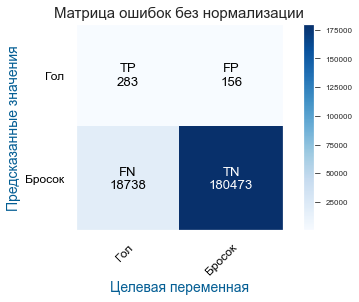

In [274]:
confusion_matrix_f(['Гол','Бросок'], y_val, np.where(y_pred.data[:, 0]>0.5, 1, 0), 1, normalize=False)

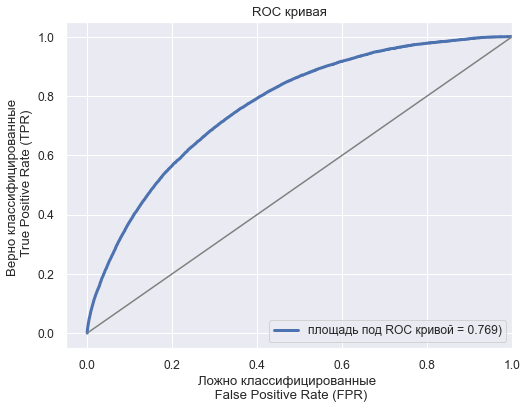

In [275]:
ROC_curve_with_area(y_val, y_pred.data[:, 0], 1.1)

In [276]:
precision_score(y_val, y_pred_bin.round(0))

0.6446469248291572

In [277]:
accuracy_score(y_val, y_pred.data[:,0].round(0))

0.9053643876784373

#### Обучение на всем датасете

In [298]:
df.drop('xG', axis=1, inplace=True)

In [299]:
X = df.loc[df.event.isin(['Goal', 'Shot'])]
y = df.loc[df.event.isin(['Goal', 'Shot'])]['Goal'].values

#X.loc[df.goalie=='pull_goalie', 'goalie'] = np.nan
#X['goalie'] = X['goalie'].fillna(method='ffill')

In [300]:
task = Task('binary', metric = 'auc')
roles = {'target': TARGET_NAME,
           'drop': cols_to_drop+['shootsCatches', 'sector', 'primaryPosition', 'season', 'goalie'],
         }

In [302]:
automl = TabularAutoML(task = task, 
                       timeout = TIMEOUT,
                       cpu_limit = N_THREADS,
                       reader_params = {'n_jobs': N_THREADS, 'cv': N_FOLDS, 'random_state': RANDOM_STATE},
                       verbose = 1
                      )
oof_pred = automl.fit_predict(X, roles = roles)
print('oof_pred:\n{}\nShape = {}'.format(oof_pred, oof_pred.shape))

oof_pred:
array([[0.13070257],
       [0.07746813],
       [0.13125503],
       ...,
       [0.0592788 ],
       [0.15476488],
       [0.21758388]], dtype=float32)
Shape = (759464, 1)


<AxesSubplot:xlabel='Feature'>

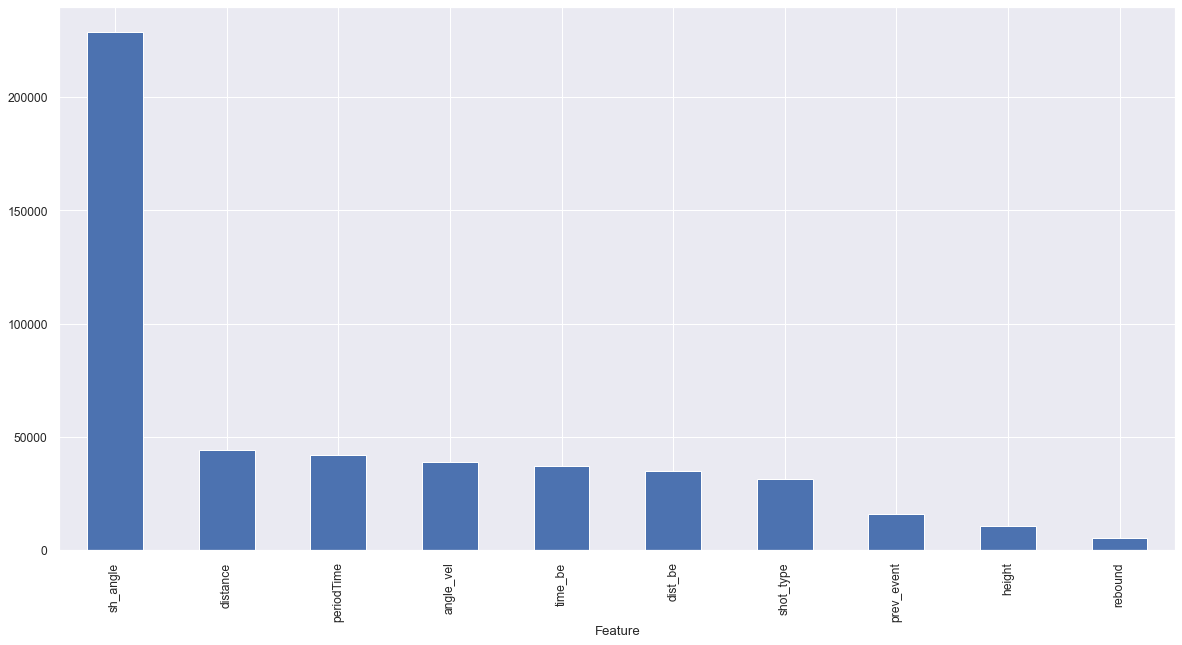

In [303]:
fast_fi = automl.get_feature_scores('fast')
fast_fi.set_index('Feature')['Importance'].plot.bar(figsize = (20, 10), grid = True)

In [304]:
y_pred = automl.predict(X)

In [305]:
#roc_score(y_val, y_pred.data[:, 0])

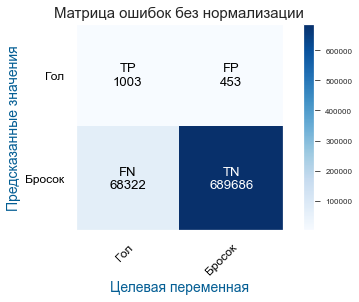

In [306]:
confusion_matrix_f(['Гол','Бросок'], y, np.where(y_pred.data[:, 0]>0.5, 1, 0), 1, normalize=False)

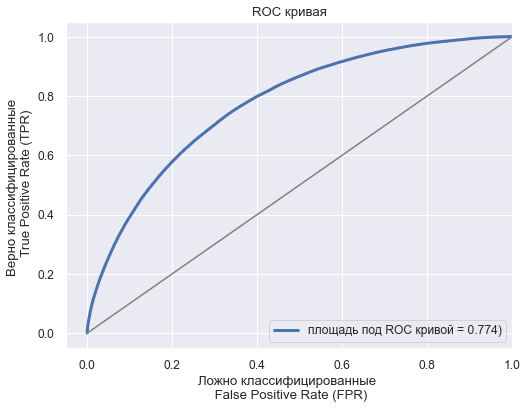

In [307]:
ROC_curve_with_area(y, y_pred.data[:, 0], 1.1)

In [308]:
precision_score(y, y_pred.data[:,0].round(0))

0.6888736263736264

In [310]:
accuracy_score(y, y_pred.data[:,0].round(0))

0.9094427122286244

In [311]:
# добавляем xG
df.loc[df.event.isin(['Goal', 'Shot']), 'xG'] = y_pred.data[:,0]

In [312]:
df.to_csv('df_temp.csv', index=False)

In [313]:
df.groupby(['player', 'season'])['Goal','xG'].sum()

Goal         xG
player            season                 
A.J. Greer        2016     0.0   1.123971
                  2017     0.0   0.947197
                  2018     1.0   1.608357
                  2020     0.0   0.000000
Aaron Dell        2016     0.0   0.000000
...                        ...        ...
Zemgus Girgensons 2019    12.0  10.190847
Zenon Konopka     2010     2.0   6.083962
                  2011     3.0   2.438654
                  2012     0.0   1.428476
                  2013     1.0   1.291516

[10629 rows x 2 columns]

In [314]:
pos_ren = {'LW':'Left Wing', 'C': 'Center', 'D': 'Defenseman', 'RW': 'Right Wing', 'G': 'Goalie'}

In [315]:
set_pos = pl[['fullName', 'primaryPosition']].drop_duplicates(subset='fullName').set_index(
    'fullName')['primaryPosition'].map(pos_ren).to_dict()

In [316]:
# имена игроков из событий с их id
player_name = df.set_index('player_id')['player'].to_dict()
pst['player'] = pst['person'].map(player_name)

In [317]:
pst['position'] = pst['player'].map(set_pos)

In [456]:
df = pd.read_csv('df_temp.csv')

## Параметры и оценки игроков 

В компьютреных играх относящихся к спорту (серия EA Sports или менеджеры) существуют свои оценки игровых стилей и навыков игроков.  
Посмотрим на примере NHL 21 какие рейтинги можно рассчитать по текущим данным. 
<BR>  
в серии **EA Sports** (**NHL 21**) - минимальный рейтинг 50, максимальный 99, разделено на разделов:  
**Puck Skills** - Навыки обращения с шайбой: **Deking** - обводка, **Hand-Eye** - глазомер, **Passing** - Пас, **Puck Control** - контроль шайбы.   
**Defense** - Защита:  **Def. Awareness** - 'чутье в защите', **Faceoffs** - врасывания, **Shot Blocking** - блокирование бросков, **Stick Checking** - прессинг клюшкой  
**Skating** - Катание: **Accelaration** - ускорение, **Agility** - ловкость, **Balance** - Баланс, **Endurance** - Выносливость, **Speed** - скорость.  
**Shooting** - броски: **Slap Shot Accuracy**, **Slap Shot Power**, **Wrist Shot Accuracy**, **Wrist Shot Power** - сила и точность щелчков и кистевых бросков   
**Senses** - Чутье: **Discipline** - дисциплина, **Off. Awareness** - действия в атаке, **Poise** - самообладание  
**Physical** - Физические параметры: **Aggresiveness** - Аггресивность, **Body Checking** - игра в тело, **Durability** - стойкость, **Fighting skill** - навык драк, **Strength** - сила.    
<BR>  
Из этих параметров мы не можем оценить те параметры, которые связаны с перемещением игроков или относящиеся к владению клюшкой.  Какие параметры можно посчитать:  
<BR> 
**Offensive**  
- Shooting  (Все типы бросков, как сумма, основано на xG)  
- Goals  (голы - все)  
- Passing  (голевые пасы, основано на xG)  
- Hits  (силовые приемы в атаке) 
- Powerplay  (относительная статистика игры в большинстве)  
- Penalty (если фолят на игроке) 
- Giveaways  (потери шайбы, чем реже потери, тем лучше) 
    
<BR>    
    
    
**Defensive**     
- Takeaways  (перехваты - по всему полю)   
- Blocked shots  (заблокированные броски, основано на xG)   
- Penalty  (удаления, чем меньше - тем ем лучше, в еденицу времени)   
- Hits (силовые приемы в зоне защиты)    

## Игровые стили   
Атакующих игроков обычно делят на несколько стандартных типов: *Снайпер*, *Плеймейкер*, *Двухстронний форвард* (универсальный форвард), *Силовой форвард*, *Оборонительный нападающий*.  
Защитников обычно на 3 основные группы: *Оборонительный защитник*, *Атакающий защитник* и *универсальный защитник*. У защитников часто роль меняется от тренера или игры - в равных или неравных составах.  

### SNIPER TALENT

Первый параметр который наиболее важный, насколько игрок чаще забивает голы, чем в среднем по лиге, он носит название **shot_multiplier**. Для его расчета вначале рассчитываются , так называемые *regressed_shots*, которые немного стабилизируют результаты (для тех игроков, кто мало играл)  за счет добавления некоторого количества бросков при средней результативности  
Для начала стгруппируем данные (по сезону и игроку) и добавим статистику об игровом времени.

In [318]:
# группирем xG
xgoals = df.groupby(['season', 'player', 'primaryPosition'])['xG'].sum().reset_index()

# всего игр
total_games = pst.groupby(['season', 'player'])['game_id'].nunique().reset_index()
total_games['season'] = total_games['season'].astype('int')

# игровое время
icetime = pst.groupby(['season', 'player'])['timeOnIce', 'goals', 'shots'].sum().reset_index()
icetime['season'] = icetime['season'].astype('int')

# Объеденияем
xgoals = xgoals.merge(total_games, left_on=['season', 'player'], 
             right_on=['season', 'player']).merge(icetime, left_on=['season', 'player'], 
             right_on=['season', 'player'])

# ожидаемые голы / 60 мин игрового времени
xgoals['xG_60min'] = xgoals['xG']*60 / xgoals['timeOnIce']

xgoals.rename(columns={'goals':'Goal', 'shots':'Shot'}, inplace=True)

xgoals.sort_values(by='xG_60min', ascending=False).head(2)

,season,player,primaryPosition,xG,game_id,timeOnIce,Goal,Shot,xG_60min
3399,2013,Spencer Abbott,LW,0.325474,1,5.27,0,2,3.705591
9219,2020,Jean-Sebastien Dea,C,0.337998,1,5.55,0,2,3.654037


Лучшие игроки с xG за 60 минут на двоих отыграли меньше получаса, при том что забили всего 1 гол на двоих. Это хорошо показывает ее несовершенство для игроков, которые мало отыграли.

In [319]:
# Считаем средние показатели по сезону
goals_mean = xgoals.groupby('season')['Goal', 'Shot'].sum()
goals_mean['season_mean'] = goals_mean['Goal'] / (goals_mean['Shot'] + goals_mean['Goal'])
season_mean = goals_mean['season_mean'].to_dict()

In [320]:
xgoals['shot_multiplyer'] = xgoals.apply(regressed_shot, axis=1)

10 Лучших игроков по xG за период 2015-2021   
Брендан Галлагер и Тайлер Сегин дважды попал в этот список. 

In [324]:
xgoals.loc[xgoals.season>2015].sort_values(by='xG', ascending=False).head(10)

,season,player,primaryPosition,xG,game_id,timeOnIce,Goal,Shot,xG_60min,shot_multiplyer
7471,2018,John Tavares,C,39.736814,82,1565.30,47,286,1.523164,1.388593
6366,2017,Connor McDavid,C,36.279996,82,1767.27,41,274,1.231730,1.329727
6281,2017,Brendan Gallagher,RW,36.261419,82,1324.86,31,278,1.642200,1.139311
7168,2018,Brendan Gallagher,RW,36.071580,82,1344.57,33,302,1.609656,1.116923
7004,2017,Tyler Seguin,C,35.291741,82,1714.54,40,335,1.235028,1.198719
5353,2016,Auston Matthews,C,35.168626,82,1445.80,40,279,1.459481,1.312695
7201,2018,Cam Atkinson,RW,35.043515,80,1550.27,41,295,1.356287,1.266506
7690,2018,Nathan MacKinnon,C,34.910817,82,1811.45,41,365,1.156338,1.146701
7909,2018,Tyler Seguin,C,34.573703,82,1701.39,33,334,1.219251,1.066512
6193,2017,Alex Ovechkin,LW,34.008045,82,1651.83,49,355,1.235286,1.312618


Овечкин как известно не самый креативный игрок в плане голов, 15+ шайб за сезон приходится из "офиса", но это самый бросающий форвард.  

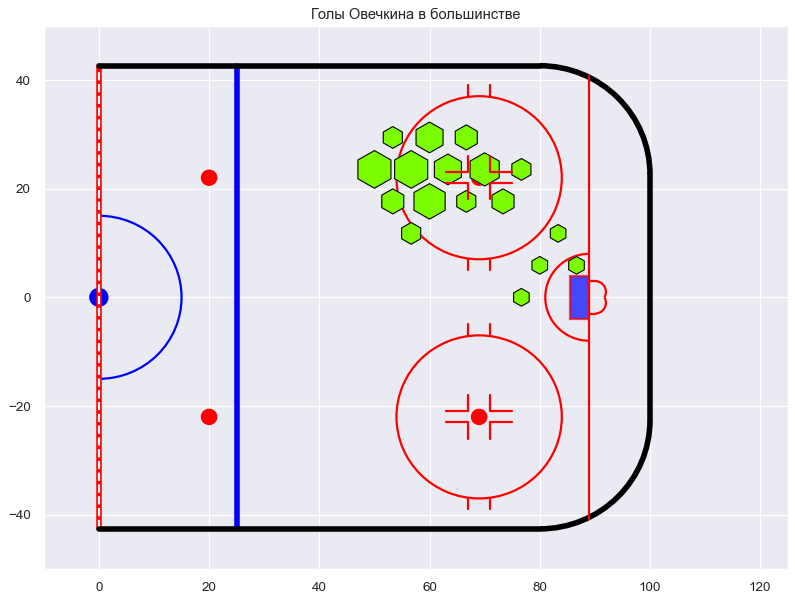

In [325]:
viz_player_shots("Голы Овечкина в большинстве", player='Alex Ovechkin',  seasons='all', filter=2, passing=False, stren='pp')

In [329]:
xgoals.loc[xgoals.season>2015].sort_values(by='shot_multiplyer', ascending=False).head(10)

,season,player,primaryPosition,xG,game_id,timeOnIce,Goal,Shot,xG_60min,shot_multiplyer
7032,2017,William Karlsson,C,23.377840,82,1534.80,43,184,0.913911,1.586400
7564,2018,Leon Draisaitl,C,28.818453,82,1852.48,50,231,0.933401,1.571800
8921,2020,Auston Matthews,C,25.965473,52,1120.76,41,222,1.390064,1.510151
8860,2020,Alex DeBrincat,LW,19.914744,52,1068.06,32,155,1.118743,1.507789
7165,2018,Brayden Point,C,29.699638,79,1494.57,41,191,1.192302,1.499221
6071,2016,T.J. Oshie,RW,17.957297,68,1214.14,33,143,0.887408,1.493995
8452,2019,Leon Draisaitl,C,26.690479,71,1605.42,43,218,0.997514,1.469271
7854,2018,Steven Stamkos,C,23.553898,82,1500.59,45,234,0.941785,1.469228
8937,2020,Brad Marchand,LW,17.681434,53,1002.23,29,143,1.058526,1.467699
6206,2017,Anders Lee,LW,29.025506,82,1415.82,40,208,1.230051,1.459847


Алекс Овечкин в 2019 году выиграл "Морис Ришар" забив 51 шайбу, Драйзайтл забил 50. В этом году приз ушел Маттьюсу - четвертое место в этом рейтинге. В 2017 году приз ушел Сидни Кросби с 44 шайбами, В. Карлссон на втором месте с 42 шайбами.  
Несмотря на то, что у многих xG около 1 за 60 мин, это объясняется малым количеством бросков, которое наносят эти форварды.   
Также стоит отметить, что слишком высокие значения **shot_multiplyer** говорят о том, что здесь больше сыграл роль фактор везения, чем неверотяный прогресс форварда. 
<BR> 
    
Силовой форвард Андерс Ли забил 40 голов всего за 208 бросков, это слишком круто.  Посмотрим на карту бросков Андерса - хороший пример того, как нужно играть на пятаки и на добиваниях   
https://www.youtube.com/watch?v=p4bbsz5q8Wg

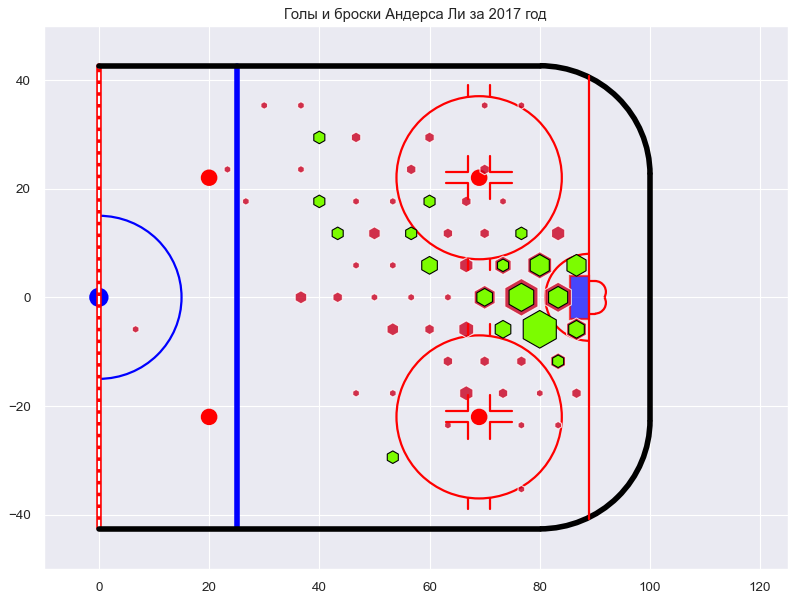

In [461]:
viz_player_shots('Голы и броски Андерса Ли за 2017 год', player='Anders Lee',  seasons=['2017'], filter=1, passing=False)

In [463]:
xgoals.query('primaryPosition=="D"').sort_values(by='shot_multiplyer', ascending=False).head(5)

,season,player,primaryPosition,xG,game_id,timeOnIce,Goal,Shot,xG_60min,shot_multiplyer
4330,2014,Trevor Daley,D,7.576446,68,1555.52,16,113,0.292241,1.213406
3393,2013,Shea Weber,D,11.860631,79,2125.37,23,195,0.334830,1.184345
3250,2013,Nick Holden,D,3.932158,54,1008.90,10,66,0.233848,1.165552
2631,2013,Alec Martinez,D,6.225362,61,956.66,11,79,0.390444,1.157340
491,2010,Lubomir Visnovsky,D,9.628709,81,1967.72,18,152,0.293600,1.155064


Что можно заметить, эти защитники забил больше 10 голов. Уэбер выбил 20 в сезоне 2015-2016. Но у защитников немного другая ситуация - много бросков идет от синей линии, где xG гораздо ниже. Что еще можно заметить, среди них нет призеров "Норрис Трофи" 

In [464]:
xgoals.query('player=="Mark Giordano"')

,season,player,primaryPosition,xG,game_id,timeOnIce,Goal,Shot,xG_60min,shot_multiplyer
521,2010,Mark Giordano,D,7.575567,82,1897.58,8,165,0.239534,0.845416
1423,2011,Mark Giordano,D,6.123883,61,1404.25,9,125,0.261658,0.961598
2279,2012,Mark Giordano,D,2.573478,47,1088.52,4,58,0.141852,0.969759
3140,2013,Mark Giordano,D,9.336740,64,1614.95,14,180,0.346887,0.981175
4024,2014,Mark Giordano,D,8.277020,61,1535.56,11,157,0.323414,0.948179
4910,2015,Mark Giordano,D,11.191282,82,2033.02,21,212,0.330285,1.088238
5800,2016,Mark Giordano,D,7.560636,81,1910.17,12,151,0.237486,0.986035
6694,2017,Mark Giordano,D,10.871117,82,2032.61,13,214,0.320901,0.878792
7600,2018,Mark Giordano,D,11.184329,78,1890.64,17,221,0.354938,0.950310
8485,2019,Mark Giordano,D,6.561176,60,1433.50,5,157,0.274622,0.770154


В каком сезоне Марк Джиордано выиграл заветный приз? правильно в 2019, когда забил всего 5 голов. Оценка защитников сложней, и оценивают действия на всей площадке, а не только в зоне атаки.   

Голы не основной параметр, особенно для защитников. Продолжим расчет параметров

# EXTENDED STATS    
По похожее методике нормализуем голевые передачи, силовые приемы, блокированные броски

In [465]:
plas = pst.groupby('player')['position'].count().sort_values(ascending=False)

In [466]:
plas.columns = ['player', 'pos']

In [467]:
pst.loc[pst.player=='Artemi Panarin', 'position'] = 'Left Wing'

In [468]:
total_stats = pst.groupby(['season', 'position'])['assists', 'goals', 'shots', 
                                                  'hits', 'takeaways', 'giveaways', 'blocked'].sum().reset_index()
total_players = pst.groupby(['season', 'position'])['person'].nunique().reset_index()

In [469]:
total_stats = total_stats.merge(total_players, left_on=['season', 'position'], right_on=['season', 'position'])

In [470]:
xgoals.head(2)

,season,player,primaryPosition,xG,game_id,timeOnIce,Goal,Shot,xG_60min,shot_multiplyer
0,2010,Aaron Gagnon,C,0.733050,19,153.19,0,9,0.287114,0.976562
1,2010,Aaron Palushaj,RW,0.265715,3,25.55,0,3,0.623989,0.992063


## Assists - голевые передачи

In [471]:
assists = pst.groupby(['player', 'season'])['assists', 'timeOnIce'].sum().reset_index()

games = pst.groupby(['player', 'season', 'position'])['game_id'].nunique().reset_index()
assists = assists.merge(games, left_on=['season', 'player'], right_on=['season', 'player'])
assists['xA_60min'] = assists['assists']*60/assists['timeOnIce']
assists.groupby(['position'])['timeOnIce', 'assists'].median()

,timeOnIce,assists
position,,
Center,749.865,9
Defenseman,891.525,8
Left Wing,682.430,8
Right Wing,685.610,8


In [473]:
assists = assists.apply(passes_normalize, axis=1)

In [474]:
assists.sort_values(by='pass_mult',ascending=False).head(10)

,player,season,assists,timeOnIce,position,game_id,xA_60min,pass_mult
7076,Nikita Kucherov,2018,87,1637.13,Right Wing,82,3.188507,0.270942
2199,Connor McDavid,2020,71,1224.42,Center,55,3.479198,0.266744
3553,Henrik Sedin,2010,75,1579.22,Center,82,2.849508,0.237871
764,Artemi Panarin,2019,63,1421.64,Left Wing,69,2.658901,0.223605
2198,Connor McDavid,2019,63,1399.47,Center,64,2.701023,0.220743
942,Blake Wheeler,2018,71,1698.19,Right Wing,82,2.508553,0.220096
2197,Connor McDavid,2018,75,1781.32,Center,78,2.526217,0.219065
6754,Mitchell Marner,2018,68,1625.44,Right Wing,82,2.510090,0.218399
1034,Brad Marchand,2019,59,1361.68,Left Wing,70,2.599730,0.217251
8512,Sidney Crosby,2012,41,759.75,Center,36,3.237907,0.217191


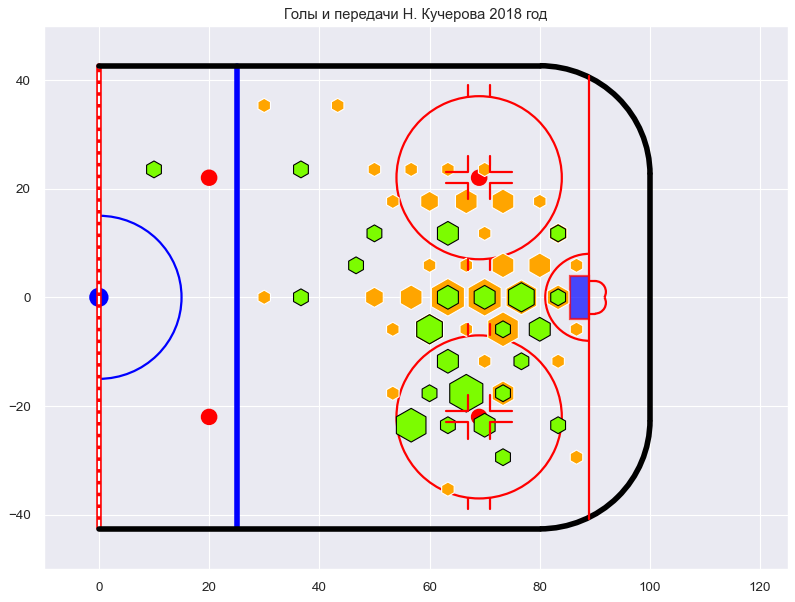

In [475]:
viz_player_shots('Голы и передачи Н. Кучерова 2018 год', player='Nikita Kucherov',  seasons=['2018'], filter=1, passing=True)

## HITS - силовые приемы

In [476]:
hits = pst.groupby(['player', 'season'])['hits', 'timeOnIce'].sum().reset_index()
hits = hits.merge(games, left_on=['season', 'player'], right_on=['season', 'player'])
hits['xH_60min'] = hits['hits']*60/hits['timeOnIce']
hits.groupby(['position'])['timeOnIce', 'hits'].median()

,timeOnIce,hits
position,,
Center,749.865,40
Defenseman,891.525,49
Left Wing,682.430,46
Right Wing,685.610,46


In [479]:
hits = hits.apply(hits_normalize, axis=1).sort_values(by='hits')

In [480]:
hits.sort_values(by='hits_mult', ascending=False).head(10)

,player,season,hits,timeOnIce,position,game_id,xH_60min,hits_mult
6165,Matt Martin,2014,382,879.00,Left Wing,78,26.075085,0.380299
6166,Matt Martin,2015,365,844.52,Left Wing,80,25.931890,0.373181
9552,William Carrier,2018,277,537.01,Left Wing,54,30.949144,0.364498
8147,Ryan Reaves,2019,316,720.33,Right Wing,71,26.321269,0.356814
6162,Matt Martin,2011,374,972.63,Left Wing,80,23.071466,0.352592
6164,Matt Martin,2013,359,939.98,Left Wing,79,22.915381,0.346637
6167,Matt Martin,2016,300,729.55,Left Wing,82,24.672743,0.338838
6161,Matt Martin,2010,299,745.11,Left Wing,68,24.076982,0.334280
1552,Cal Clutterbuck,2014,343,967.33,Right Wing,76,21.275056,0.327528
8142,Ryan Reaves,2014,276,690.09,Right Wing,81,23.996870,0.324058


Если набрать "Лучшие силовые форварды NHL", то этих ребят не будет в списках. Это ролевики 3-4 звеньев, и в атаке они не особо полезны. Основное назначени - игры в меньшинстве и против лидеров команды соперника. 

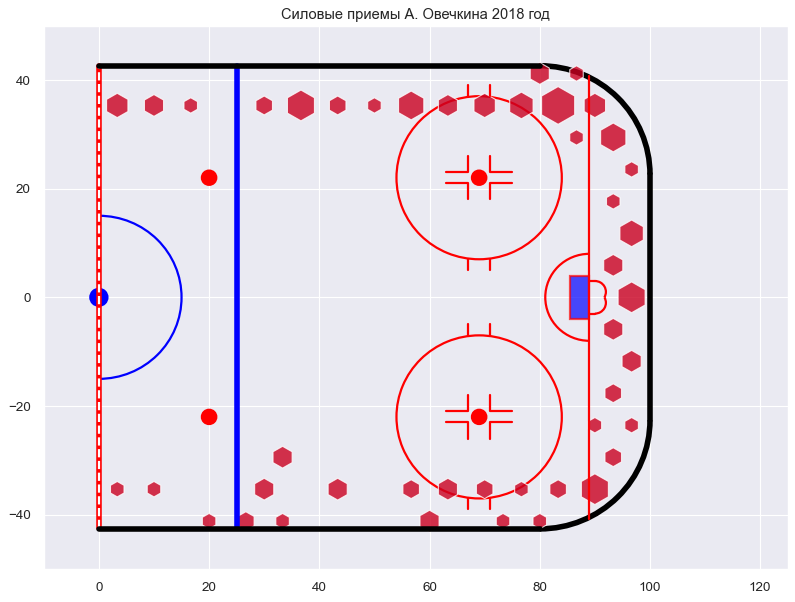

In [481]:
viz_player_shots('Силовые приемы А. Овечкина 2018 год', player='Alex Ovechkin',  seasons=['2018'], 
                 filter=2, passing=False, events=['Hit'])

## Blocked Shot - блокированные броски

In [356]:
blocks = pst.groupby(['player', 'season'])['blocked', 'timeOnIce'].sum().reset_index()
blocks = blocks.merge(games, left_on=['season', 'player'], right_on=['season', 'player'])
blocks['xBl_60min'] = blocks['blocked']*60/blocks['timeOnIce']
blocks.groupby(['position'])['timeOnIce', 'blocked'].median()

,timeOnIce,blocked
position,,
Center,749.865,21
Defenseman,891.525,61
Left Wing,682.430,17
Right Wing,685.610,16


In [483]:
blocks = blocks.apply(blocks_normalize, axis=1).sort_values(by='blocked')

In [484]:
blocks.sort_values(by='blocked_mult', ascending=False).head(10)

,player,season,blocked,timeOnIce,position,game_id,xBl_60min,blocked_mult
5235,Kris Russell,2014,283,1891.98,Defenseman,79,8.974725,0.295042
5238,Kris Russell,2017,223,1487.36,Defenseman,78,8.995805,0.284686
5237,Kris Russell,2016,213,1442.77,Defenseman,68,8.857961,0.279839
5236,Kris Russell,2015,210,1430.68,Defenseman,62,8.807001,0.278194
4838,Josh Gorges,2011,250,1855.72,Defenseman,82,8.083116,0.270093
7449,Patrik Nemeth,2017,185,1350.26,Defenseman,68,8.220639,0.261398
156,Alec Martinez,2020,168,1195.99,Defenseman,53,8.428164,0.261171
6658,Mike Weber,2014,168,1199.51,Defenseman,64,8.403431,0.260731
1587,Calvin de Haan,2015,198,1485.56,Defenseman,72,7.996984,0.259644
4841,Josh Gorges,2014,148,1028.73,Defenseman,46,8.632003,0.258921


Крис Рассел вызывает уважением своей жертвой

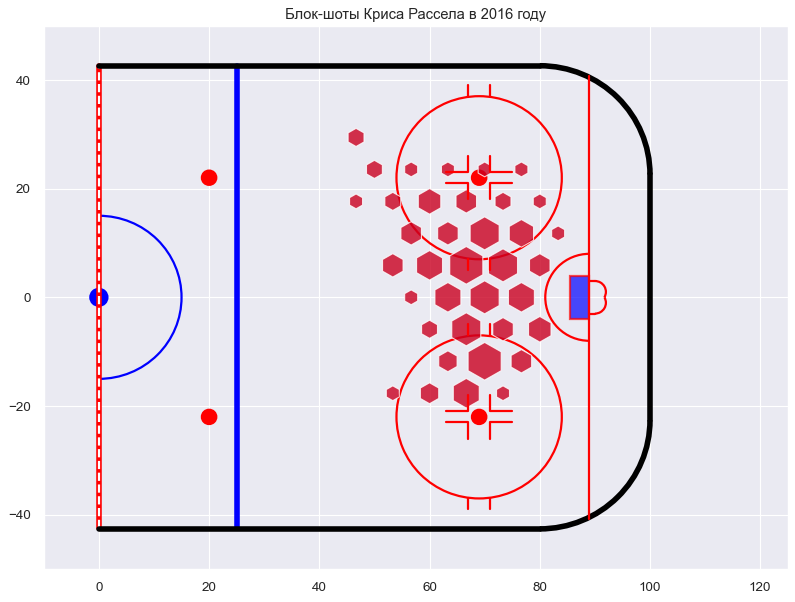

In [485]:
viz_player_shots('Блок-шоты Криса Рассела в 2016 году', player='Kris Russell', 
                 seasons=['2016'], filter=2, passing=False, events=['Blocked Shot'])

## Takeaways - перехваты шайбы

In [486]:
takeaway = pst.groupby(['player', 'season'])['takeaways', 'timeOnIce'].sum().reset_index()
takeaway = takeaway.merge(games, left_on=['season', 'player'], right_on=['season', 'player'])
takeaway['xT_60min'] = takeaway['takeaways']*60/takeaway['timeOnIce']
takeaway.groupby(['position'])['timeOnIce', 'takeaways'].median()

,timeOnIce,takeaways
position,,
Center,749.865,18
Defenseman,891.525,10
Left Wing,682.430,15
Right Wing,685.610,16


In [487]:
takeaway = takeaway.apply(takeaway_normalize, axis=1).sort_values(by='takeaways')

In [488]:
takeaway.sort_values(by='takeaways_mult', ascending=False).head(10)

,player,season,takeaways,timeOnIce,position,game_id,xT_60min,takeaways_mult
5853,Mark Stone,2015,128,1508.50,Right Wing,75,5.091150,0.229131
5856,Mark Stone,2018,122,1531.18,Right Wing,77,4.780627,0.217442
6396,Michael Grabner,2011,94,1212.43,Left Wing,78,4.651815,0.202208
4382,Joe Thornton,2010,114,1589.63,Center,80,4.302888,0.197021
5854,Mark Stone,2016,96,1317.86,Right Wing,71,4.370722,0.195228
5852,Mark Stone,2014,98,1361.71,Right Wing,80,4.318100,0.194508
7523,Pavel Datsyuk,2011,97,1369.76,Center,70,4.248920,0.189244
4214,Jeff Skinner,2017,93,1370.02,Left Wing,82,4.072933,0.185313
2196,Connor McDavid,2017,111,1767.27,Center,82,3.768524,0.179090
7549,Peter Holland,2014,67,900.32,Center,62,4.465079,0.179070


Как правильно сказать? Отборы или подборы шайбы, но суть не меняется, кому чаще достается шайба? Или быстрым МакДэвиду и Скиннеру или Стоуну. На ютубе уже знают ответ
https://www.youtube.com/watch?v=tiZGXlC41rQ

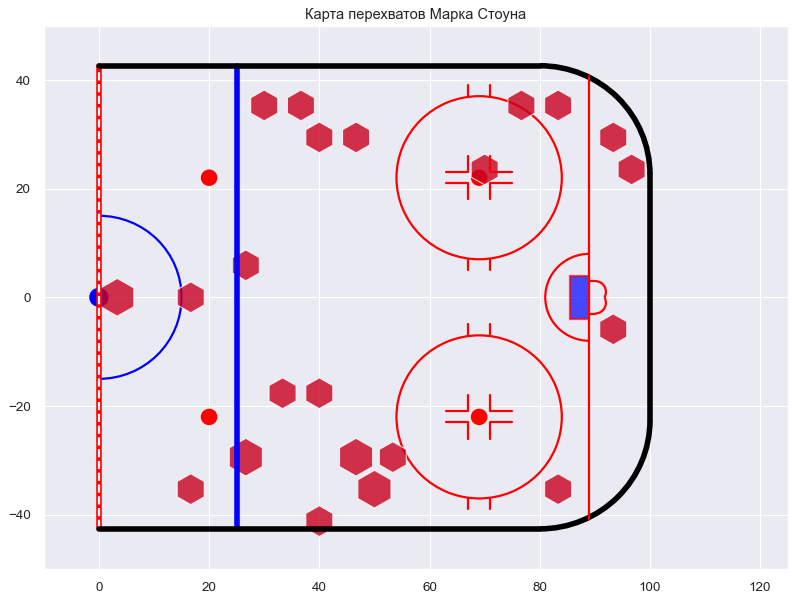

In [489]:
viz_player_shots('Карта перехватов Марка Стоуна', player='Mark Stone',  seasons=['2015'], filter=2, 
                 passing=False, events=['Takeaway'])

## Giveaways

In [366]:
giveaway = pst.groupby(['player', 'season'])['giveaways', 'timeOnIce'].sum().reset_index()
giveaway = giveaway.merge(games, left_on=['season', 'player'], right_on=['season', 'player'])
giveaway['xGv_60min'] = giveaway['giveaways']*60/giveaway['timeOnIce']
giveaway.groupby(['position'])['timeOnIce', 'giveaways'].median()

,timeOnIce,giveaways
position,,
Center,749.865,14
Defenseman,891.525,24
Left Wing,682.430,13
Right Wing,685.610,13


In [491]:
giveaway = giveaway.apply(giveaway_normalize, axis=1).sort_values(by='giveaways')

In [492]:
giveaway.sort_values(by='giveaways_mult', ascending=False).head(10)

,player,season,giveaways,timeOnIce,position,game_id,xGv_60min,giveaways_mult
6607,Mike Matheson,2018,135,1673.84,Defenseman,75,4.839172,0.198305
1295,Brent Burns,2016,153,2038.70,Defenseman,82,4.502869,0.193008
5959,Mathew Barzal,2018,117,1469.68,Center,82,4.776550,0.185702
4586,Johnny Gaudreau,2018,124,1646.07,Left Wing,82,4.519856,0.185126
4199,Jeff Petry,2018,129,1895.74,Defenseman,82,4.082838,0.175707
5960,Mathew Barzal,2019,103,1362.92,Center,68,4.534382,0.174296
2587,David Pastrnak,2018,90,1237.78,Right Wing,66,4.362649,0.168933
5073,Keith Yandle,2017,129,2008.10,Defenseman,82,3.854390,0.168895
8,Aaron Ekblad,2018,122,1938.80,Defenseman,82,3.775531,0.165218
3604,Ilya Kovalchuk,2011,120,1866.50,Left Wing,77,3.857487,0.164505


Самый занимательный рейтинг ~~рукожопов~~ игроков, которые часто теряют шайбу. Здесь Брент Бернс, Годро, пара из Флориды (Экблад и Йендл) и конечно **бог хоккея Илья Ковальчук** . Потери чаще всего из-за рискованных пасов и лишних обводок. Но подробной статистики по пасам и обводкам нет, поэтому просто потери.   
<BR>  

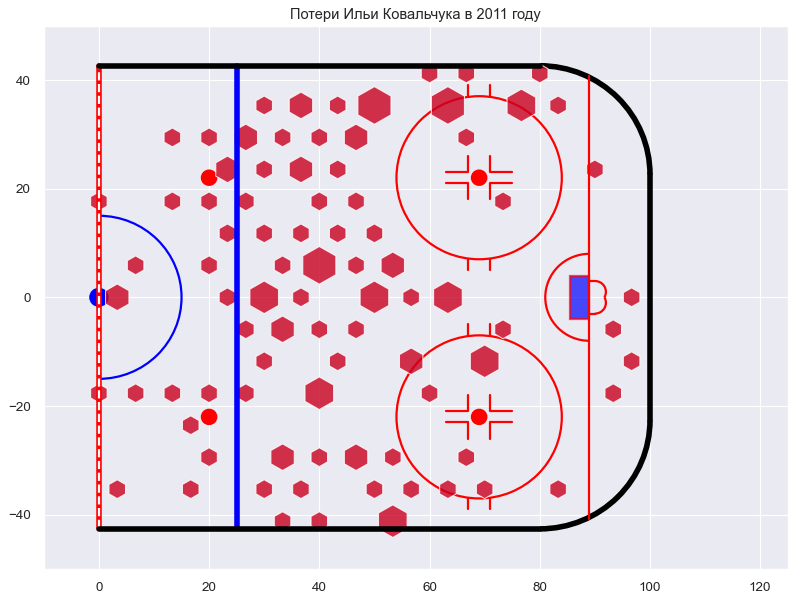

In [494]:
viz_player_shots('Потери Ильи Ковальчука в 2011 году', player='Ilya Kovalchuk',  seasons=['2011'], 
                 filter=1, passing=False, events=['Giveaway'])

Замечательно, интересно сколько из них в своей зоне? ))

#### Extended stats

In [495]:
# добавляем assists
ext_stats = xgoals.merge(assists[['season', 'player', 'xA_60min', 'pass_mult']], left_on=[
    'season', 'player'], right_on=['season', 'player'])

# добавляем hits
ext_stats = ext_stats.merge(hits[['season', 'player', 'xH_60min', 'hits_mult']], left_on=[
    'season', 'player'], right_on=['season', 'player'])

# blocks
ext_stats = ext_stats.merge(blocks[['season', 'player', 'xBl_60min', 'blocked_mult']], left_on=[
    'season', 'player'], right_on=['season', 'player'])

# takeaway
ext_stats = ext_stats.merge(takeaway[['season', 'player', 'xT_60min', 'takeaways_mult']], left_on=[
    'season', 'player'], right_on=['season', 'player'])

ext_stats = ext_stats.merge(giveaway[['season', 'player', 'xGv_60min', 'giveaways_mult']], left_on=[
    'season', 'player'], right_on=['season', 'player'])


In [496]:
df.to_csv('df_temp2.csv', index=False)

In [497]:
ext_stats.to_csv('est_stats2.csv', index=False)

Интересно! 

In [498]:
df.loc[(df.player=='Shea Weber')&(df.season==2015)].groupby('shot_type')['xG', 'Goal'].sum()

,xG,Goal
shot_type,,
Backhand,0.038835,0.0
Deflected,0.239224,0.0
Slap Shot,5.117902,15.0
Snap Shot,1.337821,4.0
Wrist Shot,2.693497,1.0
missed_shot,0.000000,0.0


Тот случай, когда катиться к воротам необязательно
https://www.youtube.com/watch?v=CHlC8bhXoR4

## ДАЛЬШЕ СЧИТАЕМ РЕЙТИНГИ

In [374]:
ext_stats.head(2)

,season,player,primaryPosition,xG,game_id,timeOnIce,Goal,Shot,xG_60min,shot_multiplyer,xA_60min,pass_mult,xH_60min,hits_mult,xBl_60min,blocked_mult,xT_60min,takeaways_mult,xGv_60min,giveaways_mult
0,2010,Aaron Gagnon,C,0.733050,19,153.19,0,9,0.287114,0.976562,0.783341,0.079007,4.700046,0.081572,1.958352,0.069813,1.566682,0.083654,0.000000,0.051033
1,2010,Aaron Palushaj,RW,0.265715,3,25.55,0,3,0.623989,0.992063,0.000000,0.079941,7.045010,0.091362,2.348337,0.063953,0.000000,0.079941,4.696673,0.071526


In [509]:
es = ext_stats.copy()
es = es.drop_duplicates(subset=['season', 'player'])

## Shooting - броски по воротам. 
Комплексная оценка, основанная на **shot_multiplyer** с небольшой регулеризацией в виде голов и бросков, чтобы в рейтинг не попали игроки с небольшим количеством бросков и 1 голом. 

In [520]:
def metric_calc(metric, season, es=es):
    
    metric_convert = {'pass_mult': 'xA_60min',
                     'hits_mult': 'xH_60min', 
                     'blocked_mult': 'xBl_60min', 
                     'takeaways_mult': 'xT_60min',
                     'giveaways_mult': 'xGv_60min'}
    
    m_koef = {'shot_multiplyer': [500,350,400],
              'pass_mult': [500,350,400],
              'hits_mult': [7600, 10500, 9000], 
              'blocked_mult': [1450, 2100, 1800], 
              'takeaways_mult': [1450, 2100, 1800],
              'giveaways_mult': [1450, 2100, 1800]}
    
    m_all, m12, m20 = m_koef[metric] # разбиваем список на попр. коэф-ты
    
    if metric == 'shot_multiplyer':
        if season == 2020:
            es.loc[es.season==season, metric] = es.loc[es.season==season, metric] + es.loc[
                    es.season==season, 'Goal']/85 + es.loc[es.season==season, 'Shot']/m20
        elif season == 2012:
            es.loc[es.season==season, metric] = es.loc[es.season==season, metric] + es.loc[
                    es.season==season, 'Goal']/70 + es.loc[es.season==season, 'Shot']/m12
        else:
                es.loc[es.season==season, metric] = es.loc[es.season==season, metric] + es.loc[
                    es.season==season, 'Goal']/100 + es.loc[es.season==season, 'Shot']/m_all
    else:
        metric_60 = metric_convert[metric] # конвертим в метрику_60min
        
        if season == 2020:
            es.loc[es.season==season, metric] = es.loc[es.season==season, metric] + es.loc[
                es.season==season, metric_60] * es.loc[es.season==season, 'timeOnIce']/m20
        elif season == 2012:
            es.loc[es.season==season, metric] = es.loc[es.season==season, metric] + es.loc[
                es.season==season, metric_60] * es.loc[es.season==season, 'timeOnIce']/m12
        else:
            es.loc[es.season==season, metric] = es.loc[es.season==season, metric] + es.loc[
                es.season==season, metric_60] * es.loc[es.season==season, 'timeOnIce']/m_all
            
    metric_min = 0 #es.loc[es.season==season, metric].min() # минималка 50 ни разу не попал 
    metric_025 = es.loc[es.season==season, metric].quantile(0.25) # рейтинг 63 так себе
    metric_050 = es.loc[es.season==season, metric].quantile(0.5) # средний рейтинг 75 
    metric_075 = es.loc[es.season==season, metric].quantile(0.75) # рейтинг 85
    metric_max = es.loc[es.season==season, metric].max() # рейтинг 100
    
    es.loc[(es.season==season) & (es[metric] > metric_075), metric] = ((
    es.loc[(es.season==season) & (es[metric] > metric_075), metric] 
        - metric_075) / (metric_max - metric_075))*14 + 85

    es.loc[(es.season==season) & (es[metric].between(metric_050, metric_075)), metric] = ((
    es.loc[(es.season==season) & (es[metric].between(metric_050, metric_075)), metric] 
        - metric_050) / (metric_075 - metric_050) )*10 + 75

    es.loc[(es.season==season) & (es[metric].between(metric_025, metric_050)), metric] = ((
    es.loc[(es.season==season) & (es[metric].between(metric_025, metric_050)), metric] 
        - metric_025) / (metric_050 - metric_025))*12 + 63

    es.loc[(es.season==season) & (es[metric] < metric_025), metric] = ((
    es.loc[(es.season==season) & (es[metric] < metric_025), metric] 
        - metric_min) / (metric_025 - metric_min))*13 + 50    
    
    return es.loc[(es.season==season), metric]

In [521]:
metrics = ['shot_multiplyer', 'pass_mult', 'hits_mult', 'blocked_mult', 'takeaways_mult', 'giveaways_mult']
for metric in metrics:
    for season in range(2010, 2021, 1):
        es.loc[(es.season==season), metric] = metric_calc(metric, season)

In [540]:
es.loc[es.season==2013].sort_values(by='shot_multiplyer', 
                                    ascending=False)[['player', 'primaryPosition', 'shot_multiplyer']].head(5)

,player,primaryPosition,shot_multiplyer
2640,Alex Ovechkin,LW,99.000000
2816,Corey Perry,RW,96.351019
3014,Joe Pavelski,C,95.834581
3190,Max Pacioretty,LW,95.025415
3308,Phil Kessel,RW,94.400208


Выглядит прекрасно! Посмотрим на защитников. 

In [542]:
es.loc[es.primaryPosition=='D'].sort_values(
    by='shot_multiplyer', ascending=False)[['player', 'season', 'primaryPosition', 'shot_multiplyer']].head(5)

,player,season,primaryPosition,shot_multiplyer
5401,Brent Burns,2016,D,93.154087
4502,Brent Burns,2015,D,91.531849
272,Dustin Byfuglien,2010,D,89.947383
3393,Shea Weber,2013,D,89.849503
9188,Jakob Chychrun,2020,D,89.488656


Здесь всё тоже правдоподобно

## Рейтинг пасов

In [543]:
es.loc[es.season==2018].sort_values(by='pass_mult', 
                                    ascending=False)[['player', 'primaryPosition', 'pass_mult']].head(5)

,player,primaryPosition,pass_mult
7713,Nikita Kucherov,RW,99.000000
7254,Connor McDavid,C,96.422786
7139,Blake Wheeler,RW,95.595367
7681,Mitchell Marner,RW,94.970537
7174,Brent Burns,D,94.678935


## HITS - силовые приемы 

In [544]:
es.loc[es.season==2018].sort_values(by='hits_mult', 
                                    ascending=False)[['player', 'primaryPosition', 'hits_mult']].head(5)

,player,primaryPosition,hits_mult
7813,Ryan Reaves,RW,99.000000
7935,William Carrier,LW,97.738072
7559,Lawson Crouse,LW,97.667887
7630,Matt Martin,LW,97.191294
7161,Brandon Tanev,LW,96.938968


## BLOCKED SHOTS - Блокированные броски

In [546]:
es.loc[es.season==2016].sort_values(by='blocked_mult', 
                                    ascending=False)[['player', 'primaryPosition', 'blocked_mult']].head(5)

,player,primaryPosition,blocked_mult
5753,Kris Russell,D,99.000000
5564,Erik Karlsson,D,97.831092
5601,Ian Cole,D,97.298900
5428,Calvin de Haan,D,96.944361
5800,Mark Giordano,D,96.370843


## TAKEAWAY - перехваты

In [547]:
es.loc[es.season==2020].sort_values(by='takeaways_mult', 
                                    ascending=False)[['player', 'primaryPosition', 'takeaways_mult']].head(5)

,player,primaryPosition,takeaways_mult
9381,Mark Stone,RW,99.000000
9025,Connor Brown,RW,98.329043
9165,Jack Hughes,C,98.272484
9341,Leon Draisaitl,C,97.818360
9448,Mitchell Marner,RW,97.138807


## GIVEAWAY - потери, антирейтинг

In [549]:
es.loc[es.season==2012].sort_values(by='giveaways_mult', 
                                    ascending=False)[['player', 'primaryPosition', 'giveaways_mult']].head(5)

,player,primaryPosition,giveaways_mult
2031,Dion Phaneuf,D,99.000000
2045,Dustin Byfuglien,D,97.878936
1820,Andrei Markov,D,97.787744
2152,Jeff Petry,D,96.201901
2575,Travis Hamonic,D,96.166749


In [550]:
es.columns = ['season', 'player', 'position', 'xG', 'games', 'timeOnIce', 'Goal', 'Shot', 'xG_60m', 
              'Shooting', 'xA_60m', 'Passing', 'xH_60m', 'Hits', 'xBl_60m', 
              'Blocks', 'xT_60m', 'Takeaways', 'xGv_60m', 'Giveaways']

### Добавляем PowerPLay, plus-minus

In [552]:
pst['season'] = pst['game_id'].apply(lambda x: str(x)[0:4])
pst['season'] = pst['season'].astype('int')

pst['match_num'] = pst['game_id'].apply(lambda x: str(x)[6::])
pst['match_num'] = pst['match_num'].astype('int')

In [553]:
#pst['powerPlayTimeOnIce'] = pst['powerPlayTimeOnIce'].apply(time_min)

In [554]:
add_st = pst.groupby(['season', 'player'])['powerPlayGoals', 'powerPlayAssists', 'powerPlayTimeOnIce', 'plusMinus'].sum().reset_index()

In [555]:
add_st['pp_points'] = add_st['powerPlayGoals'] + add_st['powerPlayAssists']

In [556]:
add_st['pp_points_60m'] = add_st['pp_points'] *60 / add_st['powerPlayTimeOnIce']

In [558]:
add_st.loc[add_st.powerPlayTimeOnIce>20].sort_values(by='pp_points_60m', ascending=False).head(10)

,season,player,powerPlayGoals,powerPlayAssists,powerPlayTimeOnIce,plusMinus,pp_points,pp_points_60m
220,2010,Daniel Winnik,2,3,27.18,-2,5,11.037528
8170,2019,Connor McDavid,11,32,248.81,-6,43,10.369358
6534,2017,Jan Rutta,2,2,23.80,-1,4,10.084034
9450,2020,Mike Hoffman,7,10,101.28,2,17,10.071090
6965,2017,Taylor Hall,13,24,220.99,14,37,10.045703
9511,2020,Nikolaj Ehlers,6,7,78.12,15,13,9.984639
4593,2015,Connor Brown,1,3,24.06,-2,4,9.975062
2360,2012,Mike Ribeiro,6,21,164.08,-4,27,9.873233
9044,2020,Connor McDavid,9,28,229.57,23,37,9.670253
8463,2019,Leon Draisaitl,16,28,273.01,-7,44,9.669975


In [559]:
add_st['pp_points'] = add_st['powerPlayGoals'] + add_st['powerPlayAssists']*0.5

In [560]:
add_st.loc[add_st.season==2020]

,season,player,powerPlayGoals,powerPlayAssists,powerPlayTimeOnIce,plusMinus,pp_points,pp_points_60m
8851,2020,A.J. Greer,0,0,0.00,0,0.0,NaN
8852,2020,Aaron Ekblad,6,5,135.85,5,8.5,4.858300
8853,2020,Aaron Ness,0,0,0.00,0,0.0,NaN
8854,2020,Adam Boqvist,1,7,118.28,-7,4.5,4.058167
8855,2020,Adam Brooks,1,0,1.42,4,1.0,42.253521
...,...,...,...,...,...,...,...,...
9753,2020,Zach Werenski,0,5,76.01,-9,2.5,3.946849
9754,2020,Zach Whitecloud,0,0,2.40,9,0.0,0.000000
9755,2020,Zack Kassian,0,0,5.10,-4,0.0,0.000000
9756,2020,Zack MacEwen,0,0,4.28,-2,0.0,0.000000


In [561]:
def powerplay_normalize(row):
    
    if row['season'] == 2020:
        rpp_points = row['pp_points'] + 2
        r_pp_time = row['powerPlayTimeOnIce'] + 55
    else:
        rpp_points = row['pp_points'] + 3
        r_pp_time = row['powerPlayTimeOnIce'] + 70
    
    regressed_pp_points_60min = rpp_points / r_pp_time
    
    row['pp_60min_norm'] = regressed_pp_points_60min
    
    
    
    return row

add_st = add_st.apply(powerplay_normalize, axis=1).sort_values(by='pp_60min_norm')

In [562]:
add_st['pp_60min_norm'] = add_st['pp_60min_norm']*509+50

## ПЛЮС-МИНУС

Рейтинг "плюс-минус" или как его еще называют "рейтинг полезности" не отображает навык играть в обороне, но часто используется именно для этого. Рейтинг больше информативный, так что его оставим без изменений. Просто отмасштабируем в пределах одного сезона 

In [564]:
ratings = es.merge(add_st, left_on=['season', 'player'], right_on=[
    'season', 'player'])[['season', 'player', 'position', 'xG', 'Goal', 'Shooting', 'Passing', 
                          'Hits', 'Blocks', 'Takeaways', 'Giveaways', 'pp_60min_norm', 'plusMinus']]

In [565]:
ratings = ratings.rename(columns = {'pp_60min_norm': 'Powerplay'})

In [566]:
ratings[['Goal', 'Shooting', 'Passing', 'Blocks', 'Hits', 'Takeaways', 'Giveaways', 'Powerplay', 'plusMinus']] = ratings[[
    'Goal', 'Shooting', 'Passing', 'Blocks', 'Hits', 'Takeaways', 'Giveaways', 'Powerplay', 'plusMinus']].astype('int')

In [567]:
ratings.to_csv('ratings.csv', index=False)

### Примеры расчитанных рейтингов

#### Илья Ковальчук

In [568]:
ratings.loc[ratings.player=='Ilya Kovalchuk']

,season,player,position,xG,Goal,Shooting,Passing,Hits,Blocks,Takeaways,Giveaways,Powerplay,plusMinus
329,2010,Ilya Kovalchuk,LW,23.193280,31,92,87,65,65,86,99,72,-26
1230,2011,Ilya Kovalchuk,LW,30.968268,37,92,92,64,69,87,99,75,-9
2099,2012,Ilya Kovalchuk,LW,10.345347,11,87,88,60,68,75,94,70,-6
7382,2018,Ilya Kovalchuk,LW,14.103717,16,86,82,65,67,77,85,69,-26
8276,2019,Ilya Kovalchuk,LW,12.435291,10,83,82,77,74,70,78,68,-4


Хорошая демонстрация как изменились рейтинги Ковальчука через промежуток игры в КХЛ. Из одного из стабильных снайперов лиги с рейтингом бросков 92 до середняка с рейтигом 83. И конечно знаменитые потери шайбы в средней зоне (giveaways - 99)  

Ковальчук как обычно совмещает все навыки ))  Броски и потери шайбы. 

#### Павел Бучневич

In [569]:
ratings.loc[ratings.player=='Pavel Buchnevich']

,season,player,position,xG,Goal,Shooting,Passing,Hits,Blocks,Takeaways,Giveaways,Powerplay,plusMinus
5964,2016,Pavel Buchnevich,RW,5.620461,8,80,78,62,62,71,77,67,6
6850,2017,Pavel Buchnevich,RW,14.310554,14,85,87,75,76,86,85,76,-3
7754,2018,Pavel Buchnevich,RW,15.216432,21,88,81,77,68,82,85,82,-10
8641,2019,Pavel Buchnevich,RW,18.180992,16,87,88,85,73,87,91,71,2
9534,2020,Pavel Buchnevich,RW,13.793775,20,90,88,79,81,89,88,68,12


Стабильно развивающийся игрок из Рейнджерс 

#### Сидни Кросби

In [418]:
ratings.loc[ratings.player=='Sidney Crosby']

,season,player,position,xG,Goal,Shooting,Passing,Hits,Blocks,Takeaways,Giveaways,Powerplay,plusMinus
778,2010,Sidney Crosby,C,17.782319,32,92,88,67,74,73,83,80,20
1665,2011,Sidney Crosby,C,8.899106,8,81,88,57,61,69,74,81,15
2512,2012,Sidney Crosby,C,15.374024,15,89,98,66,75,82,88,79,26
3395,2013,Sidney Crosby,C,28.196300,36,94,99,72,75,88,89,83,18
4267,2014,Sidney Crosby,C,26.775423,28,90,97,76,75,86,88,84,5
5164,2015,Sidney Crosby,C,25.620735,36,94,93,83,78,86,87,77,19
6055,2016,Sidney Crosby,C,29.546330,44,99,92,82,74,86,89,83,17
6931,2017,Sidney Crosby,C,30.295127,29,91,96,80,76,86,90,86,0
7843,2018,Sidney Crosby,C,28.357778,35,93,94,82,80,88,88,87,18
8725,2019,Sidney Crosby,C,11.602022,16,87,88,67,69,83,78,80,-8


#### Кирилл Капризов

In [420]:
ratings.loc[ratings.player=='Kirill Kaprizov']

,season,player,position,xG,Goal,Shooting,Passing,Hits,Blocks,Takeaways,Giveaways,Powerplay,plusMinus
9319,2020,Kirill Kaprizov,LW,17.930417,27,93,87,71,74,88,87,77,10


Первый год 27 голов и сразу *Shooting* - 93

#### Никита Гусев, неплохой первый год и плохой второй

In [421]:
ratings.loc[ratings.player=='Nikita Gusev']

,season,player,position,xG,Goal,Shooting,Passing,Hits,Blocks,Takeaways,Giveaways,Powerplay,plusMinus
8598,2019,Nikita Gusev,LW,15.969303,13,85,88,57,58,80,86,78,-15
9489,2020,Nikita Gusev,LW,7.175858,4,76,74,52,51,75,83,61,-11


#### Джо Торнтон, все еще может пасовать

In [422]:
ratings.loc[ratings.player=='Joe Thornton']

,season,player,position,xG,Goal,Shooting,Passing,Hits,Blocks,Takeaways,Giveaways,Powerplay,plusMinus
403,2010,Joe Thornton,C,16.370608,21,88,92,75,78,99,97,85,4
1306,2011,Joe Thornton,C,17.267107,18,87,96,70,75,97,95,74,17
2171,2012,Joe Thornton,C,9.181545,7,84,94,67,77,92,94,82,6
3016,2013,Joe Thornton,C,13.800187,11,84,98,75,77,97,95,68,20
3894,2014,Joe Thornton,C,13.122029,16,86,95,67,73,91,95,75,-4
4780,2015,Joe Thornton,C,12.621816,19,88,98,73,76,90,97,79,25
5669,2016,Joe Thornton,C,8.478651,7,78,91,75,76,92,89,69,7
6558,2017,Joe Thornton,C,6.263312,13,85,85,67,66,85,87,83,-9
7455,2018,Joe Thornton,C,9.997090,16,86,88,59,64,86,85,79,8
8348,2019,Joe Thornton,C,8.107605,7,79,86,62,77,92,81,70,-19


#### Евгений Кузнецов, лучший сезон в 2017 году и дальше стабильный спад

In [444]:
ratings.loc[ratings.player=='Evgeny Kuznetsov']

,season,player,position,xG,Goal,Shooting,Passing,Hits,Blocks,Takeaways,Giveaways,Powerplay,plusMinus
2920,2013,Evgeny Kuznetsov,C,1.808828,3,72,70,54,52,62,65,73,-2
3803,2014,Evgeny Kuznetsov,C,10.800049,11,83,87,69,65,85,78,82,10
4688,2015,Evgeny Kuznetsov,C,16.900403,20,88,96,79,76,89,88,79,27
5570,2016,Evgeny Kuznetsov,C,17.757224,19,88,90,76,68,87,87,74,18
6459,2017,Evgeny Kuznetsov,C,19.658428,27,90,95,74,71,87,89,81,3
7352,2018,Evgeny Kuznetsov,C,19.763785,21,88,91,72,68,86,88,77,7
8243,2019,Evgeny Kuznetsov,C,14.459976,19,88,89,70,68,80,87,72,-2
9117,2020,Evgeny Kuznetsov,C,7.609302,9,85,86,66,75,83,80,71,7


#### Эрик Карлссон - самый дорогой защитник, лучший распасовщик 2015 года и 5 лет спада (passing)

In [447]:
ratings.loc[ratings.player=='Erik Karlsson']

,season,player,position,xG,Goal,Shooting,Passing,Hits,Blocks,Takeaways,Giveaways,Powerplay,plusMinus
292,2010,Erik Karlsson,D,9.141579,13,85,87,66,86,89,94,72,-30
1193,2011,Erik Karlsson,D,13.927693,19,87,96,76,85,92,93,74,16
2068,2012,Erik Karlsson,D,4.392202,6,82,78,58,73,85,84,70,8
2917,2013,Erik Karlsson,D,12.572484,20,88,94,86,88,94,99,76,-15
3800,2014,Erik Karlsson,D,16.911713,21,88,93,81,87,90,96,73,7
4683,2015,Erik Karlsson,D,13.149851,16,86,99,81,93,89,96,68,-2
5564,2016,Erik Karlsson,D,12.182757,17,87,94,78,97,90,93,76,10
6452,2017,Erik Karlsson,D,10.265366,9,79,94,76,90,89,92,72,-25
7345,2018,Erik Karlsson,D,8.681250,3,67,89,71,86,88,88,80,6
8236,2019,Erik Karlsson,D,6.301390,6,76,89,65,87,91,91,71,-15


#### Небольшой бонус.    
**Лучшие снайперы, по среднему значению**   
Ироков 12, а клубов всего 9.  У Эдмонтона, Бостона, Торонто оказалось по 2 игрока

In [587]:
ratings.loc[ratings.season>2015].groupby('player')['Shooting'].mean().sort_values(ascending=False)[0:12]

player
Alex Ovechkin       96.2
Auston Matthews     96.2
Nikita Kucherov     95.0
Connor McDavid      94.6
Leon Draisaitl      94.2
David Pastrnak      94.0
Brad Marchand       93.6
Kirill Kaprizov     93.0
John Tavares        92.6
Sidney Crosby       92.4
Nathan MacKinnon    92.2
Patrick Kane        92.2
Name: Shooting, dtype: float64

**Лучшие распасовщики после 2016 года**  
Пара Макдэвид и Драйзайтль и здесь тоже в лидерах. Если бы С. Боумэн не махнул Панарина в Коламбус на деревяху Саада, то эта таблица выглядела по другому. 

In [588]:
ratings.loc[ratings.season>2015].groupby('player')['Passing'].mean().sort_values(ascending=False)[0:12]

player
Connor McDavid       97.80
Nikita Kucherov      95.25
Leon Draisaitl       93.80
Patrick Kane         93.80
Blake Wheeler        93.40
Artemi Panarin       93.40
Brad Marchand        93.20
Nathan MacKinnon     93.00
Mitchell Marner      92.80
Henrik Zetterberg    92.50
Nicklas Backstrom    92.40
Jakub Voracek        92.00
Name: Passing, dtype: float64

**Лучшие бросающие защитники**   
У четырех из них есть *Норрис Трофи*, и может среди этой десятки есть и будущие обладатели. 

In [579]:
ratings.loc[(ratings.position=='D')&(ratings.season>2014)].groupby('player')[
    'Shooting'].mean().sort_values(ascending=False)[0:10]

player
Brent Burns         86.666667
Dougie Hamilton     85.666667
Roman Josi          85.000000
Victor Hedman       84.333333
Zach Werenski       84.200000
Cale Makar          84.000000
Dan Boyle           84.000000
Mark Giordano       83.500000
Shea Weber          83.500000
Alex Pietrangelo    83.333333
Name: Shooting, dtype: float64

# Заключение 
<BR>  
    
В этой части проекта была подробно рассмотрена статистика, проведен анализ, рассчитан **xG** и рассчитаны относительные рейтинги игроков, включая неполные сезоны. На основании данных рейтингов можно посмотреть как проходила карьера игрока по сезонам, насколько стабильно он играет, развивается или уже начался спад. Но суммарные цифры не могут сказать, сколько игрок сомжет набрать очков (голов и пасов) в следующем сезоне. Суммарная статистика не учитывает многие факторы, такие как травмы и восстановление после них, спад в результативности всей команды, обмен игрока, смена тренера, рольк игрока в команде и пр.  
<BR>   
   
Поэтому в следующей части проекта будет рассмотрено прогнозирование результативности игрока на сезон вперед при помощи **RNN** 